<a href="https://colab.research.google.com/github/jackelinegregorio/projetos-python/blob/main/Default_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio

Imagine que você assume uma posição dentro do banco e precise construir uma solução utilizando técnicas de ciência de dados. Para isso o desafio será a construção de um modelo supervisionado buscando minimizar o risco de crédito para o financiamento de veículos.

## 1. Caso pudesse realizar perguntas ao time de negócios do Banco Pan sobre o problema de negócio que está buscando uma solução, quais seriam?


*   O foco está em melhorar a taxa de aprovação de crédito ou em prevenir inadimplência a qualquer custo?
*   Qual nível de tolerância ao risco o banco está disposto a aceitar?
*   Qual é o objetivo principal? Estamos buscando reduzir a inadimplência ou maximizar o número de aprovações com risco controlado?

## 2. Qual é o perfil típico dos clientes que foram aprovados no financiamento de veículo?

* Foi respondido abaixo, no tópico de Análise Exploratória.

## 3. No dataset contém uma variável relacionada a situação do cliente: Inadimplente ou Adimplente. Comente sobre o comportamento dessa variável para o negócio e a sua relação com solução que você desenvolveu.

*  Como a Solução Atende ao Negócio?

O modelo permite prever quais clientes têm maior probabilidade de inadimplência, ajudando a instituição a evitar aprovações de alto risco.

*  Ajuste do Threshold: O uso de threshold ajustado permite que a instituição decida quanto risco pode tolerar. Se a prioridade for minimizar inadimplência, o threshold pode ser ajustado para priorizar recall (maximizar a detecção de inadimplentes).

*  Políticas de Crédito Otimizadas: A solução ajuda a instituição a definir critérios mais precisos para aprovação e oferecer condições diferenciadas (como taxas mais altas) para perfis de maior risco.

*   Trade-off entre Precision e Recall: A precisão (precision) mede a proporção de previsões corretas para clientes previstos como inadimplentes, enquanto o recall mede a capacidade de identificar todos os inadimplentes. O modelo oferece a possibilidade de balancear essas métricas, de acordo com a estratégia da instituição.

*   Ajuste de Pesos para Melhor Detecção de Inadimplentes: O uso de técnicas como *class_weight='balanced'* e o *Stacking Ensemble* com maior peso no *XGBoost* ajudou a dar maior importância para a detecção de clientes inadimplentes, sem perder o equilíbrio na precisão.

*   Modelos Ensemble como Solução Eficaz: Técnicas como BalancedBaggingClassifier e EasyEnsembleClassifier foram aplicadas para melhorar a generalização do modelo em cenários desbalanceados (com menos clientes inadimplentes).

*   Necessidade de Analisar o Perfil dos Inadimplentes:

 A solução identificou que clientes com score de mercado baixo e renda limitada têm maior probabilidade de se tornarem inadimplentes, permitindo que a instituição desenvolva políticas proativas de mitigação de risco.

Com isso, podemos concluir que a variável **inadimplente/adimplente** é essencial para o negócio, pois está diretamente relacionada ao risco de crédito e rentabilidade da instituição. A solução desenvolvida se mostrou eficaz ao permitir:

* Antecipação do risco de inadimplência;
* Ajuste de políticas de crédito;
* Melhoria da gestão de risco financeiro.

Com as técnicas aplicadas, a instituição pode reduzir perdas financeiras, melhorar a concessão de crédito e oferecer produtos personalizados para diferentes perfis de clientes, garantindo assim uma operação mais segura e lucrativa.

## 4. Quais tratativas devem ser realizadas para tratamento nos dados (Limpeza e inconsistência nos dados)?

*   Análise e tratamento de Valores ausentes (NaNs);
*   Estratégias para lidar com valores ausentes (imputamos média e KNN);
*   Verificar tipos de dados incorretos (como coluna com o tipo errado);
*   Correlações;
*   Identificação e Remoção de Outliers;
*   Normalização e Padronização dos Dados;
*   Tratamento de Dados Duplicados;
*   Tratamento de Variáveis Categóricas;
*   Tratamento de Dados Desbalanceados;
*   Verificação de Consistências nos Dados;
*   Feature Engineering (Criação de Variáveis Derivadas).







## 5. Construa um modelo e monte um esquema de validação para testar o poder de generalização do seu modelo.

>1.  Qual algoritmo foi utilizado?

A solução que desenvolvi envolve os modelos: Regressão Logística, RandomForest, XGBoost, Catboost, Stacking Ensemble, BalancedBaggingClassifier e EasyEnsembleClassifier.

>2. Como você validou o modelo?

O modelo foi validado utilizando a técnica de Validação Cruzada Estratificada (Stratified K-Fold Cross-Validation). Esta abordagem foi escolhida para garantir que as proporções das classes (adimplente e inadimplente) fossem preservadas em cada divisão (fold), já que estamos lidando com um problema de classes desbalanceadas.

Na validação cruzada, o dataset foi dividido em K partes (folds). O modelo foi treinado em K-1 folds e validado no fold restante. Este processo foi repetido K vezes (neste caso, 5 folds), de forma que cada amostra do dataset foi utilizada tanto para treino quanto para validação ao menos uma vez.

Além disso, realizamos ajuste de threshold para encontrar o ponto ótimo que maximiza a métrica principal, garantindo que o modelo priorize a classe de maior interesse (inadimplentes).

>3.  Qual métrica foi utilizada para validar o modelo?

A principal métrica utilizada para validar o modelo foi o F1-Score. Esta métrica foi escolhida porque é a média harmônica entre a precisão (precision) e a revocação (recall), sendo especialmente adequada para cenários de classes desbalanceadas. O F1-Score equilibra a necessidade de:

* Maximizar a detecção de inadimplentes (recall) para evitar riscos financeiros.
* Garantir que as previsões de inadimplência sejam precisas (precision), minimizando falsos positivos.

Além do F1-Score, utilizamos outras métricas para uma avaliação mais completa do modelo, como precision, recall e AUC-ROC. O ajuste de threshold foi realizado para garantir que o modelo atingisse o melhor F1-Score possível.

## 6. Interpretar o Modelo
> 1. Quais as principais variáveis do seu modelo e como interpretá-las?

As principais variáveis identificadas pelo modelo são aquelas que tiveram maior importância nas previsões de inadimplência. Cada variável oferece insights valiosos sobre os fatores que influenciam o risco de crédito.

>>**RENDA**:

Reflete a capacidade financeira do cliente. Rendas mais baixas estão frequentemente associadas a maior risco de inadimplência, pois indicam menor capacidade de honrar as parcelas do financiamento.

>>**SCORE_MERCADO**:

Avalia o comportamento de crédito do cliente em outras operações. Scores baixos indicam um histórico financeiro problemático e maior risco de inadimplência.

>>**IDADE**:

Clientes mais jovens e em início de carreira podem ser considerados mais arriscados, devido a menor estabilidade financeira. Já clientes mais velhos tendem a ser mais conservadores, reduzindo o risco.

>2.  Qual o perfil dos clientes mais arriscados (high yield)?

Os clientes mais arriscados são aqueles que apresentam maior probabilidade de inadimplência, de acordo com o modelo. O perfil típico desses clientes inclui:

>>**Renda Baixa:** Clientes com renda abaixo da média (menor que R$5.000) tendem a ser mais vulneráveis financeiramente e apresentam maior risco de inadimplência.

>>**Score de Mercado Baixo:** Um score de crédito abaixo de 600 indica que o cliente tem histórico de atraso em pagamentos ou dívidas em aberto, o que eleva o risco.

>>**Clientes Jovens:** Clientes entre 20 e 30 anos tendem a ter maior risco, pois estão em início de carreira e podem apresentar menor estabilidade financeira.

>>**Limite de Cartão Reduzido:** Um limite baixo de crédito no cartão pode indicar que outras instituições já consideram esse cliente de maior risco, o que é um sinal relevante para o modelo.

>>**Financiamento de Veículos Mais Antigos:** Clientes que financiam veículos mais antigos (ano de fabricação abaixo de 2018) podem ter maior probabilidade de inadimplência, pois os veículos perdem valor rapidamente, o que torna a dívida mais arriscada.

>>**Razão Alta entre Financiamento e Renda:** Quando o valor do veículo representa uma parte significativa da renda do cliente, a probabilidade de inadimplência aumenta, já que o financiamento pode se tornar insustentável.

>3. Conclusão

O perfil dos clientes mais arriscados é caracterizado por renda e score de crédito baixos, pouca estabilidade financeira e financiamentos mais arriscados. Esse grupo exige uma política de crédito mais conservadora e uma análise criteriosa para evitar prejuízos à instituição financeira.




In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.4 MB/s eta 0:00:00


# Configurando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, auc, classification_report
import warnings
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import (
    precision_recall_curve, f1_score, classification_report, confusion_matrix,
    roc_auc_score, auc
)

# Sobre as variáveis do nosso dataset
1. Informações cadastrais do cliente: Idade, Renda e Estado
2. Informações sobre o financiamento: Data do financiamento, valor e ano do veículo
3. Informações sobre indicador de inadimplência de crédito: m3over30
  * o cliente em atraso com mais de 30 dias após três meses da contratação
4. Informações externas Bacen: Limite do Cartão de Crédito e valor financiamento do veículo atual
5. Informações de bureaux: Score de crédito:
  * Um score de crédito corresponde a um sistema de pontuação que classifica os consumidores em categorias de acordo com alguma variável (capacidade de pagamento, probabilidade de se tornar inadimplente etc.). Essa pontuação normalmente varia de 0 a 1000 e deveria ordenar a qualidade desse cliente.

  O **objetivo** desse *Case* é minimizar o risco de crédito para o financiamento de veículos.

In [ ]:
df = pd.read_csv('case_cientista_dados_PAN.txt', delimiter=';')

colunas_numericas = ['VALOR_VEICULO']

for col in colunas_numericas:
    df[col] = df[col].str.replace(',', '.').astype(float)

X = df.drop(columns=['TARGET_M3OVER30', 'DATA_FINANCIAMENTO', 'ESTADO', 'CLIENTE'])
y = df['TARGET_M3OVER30']

# Preencher valores ausentes
df.fillna(df.mean(numeric_only=True), inplace=True)

# Transformar variáveis categóricas em dummies
df = pd.get_dummies(df, columns=['ESTADO'], drop_first=True)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Dividir os dados em treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Análise Exploratória

Vamos fazer uma análise exploratória do dataframe, assim conseguimos ver se há valores nulos, se há desbalanceamento, como os dados estão distribuidos, etc.


## Verificando as correlações entre as variáveis

O que podemos fazer agora é ver se há correlação entre as variáveis, pois é fundamental para entender as relações entre elas, especialmente com a variável alvo TARGET_M3OVER30, que indica inadimplência e é nossa variável alvo.

 Para variáveis numéricas, vou usar acorrelação de *Pearson*, que mede a força e a direção da relação linear entre duas variáveis.

 Para as outras variáveis irei fazer um Mapa de Calor, sendo uma forma que ajuda identificar visualmente as correlações mais fortes entre as variáveis.

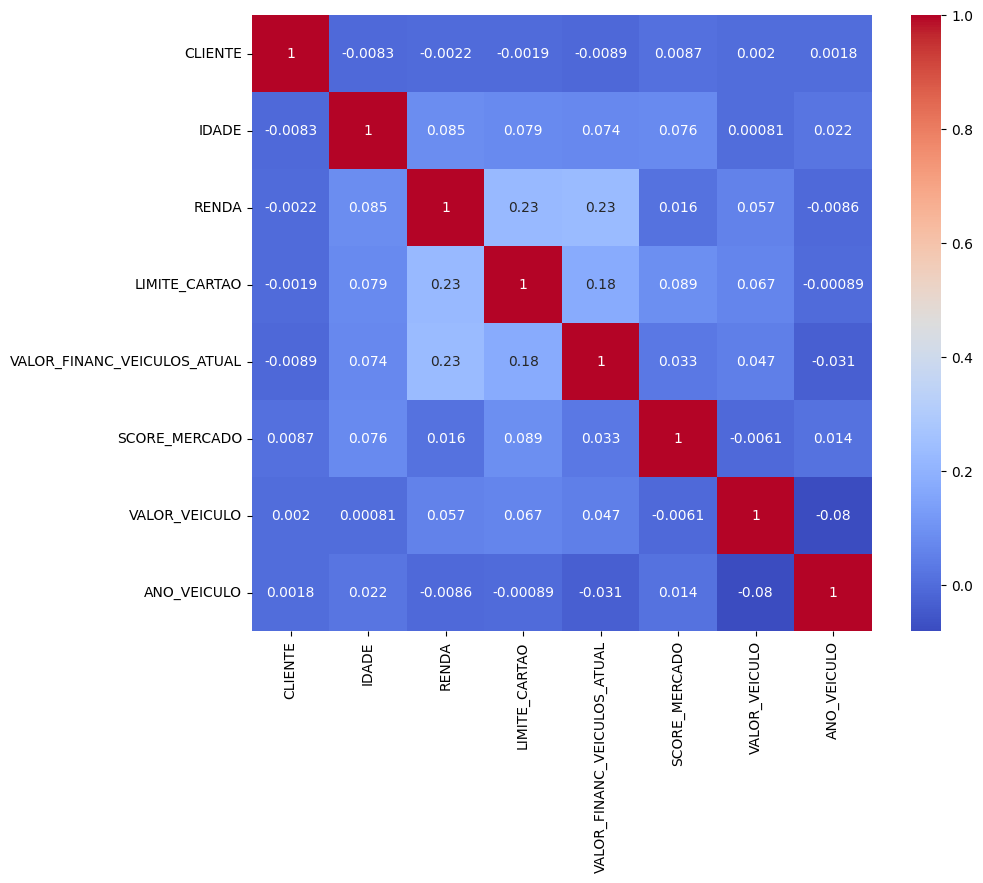

In [ ]:
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Análise das Correlações:

1. A correlação entre **LIMITE_CARTAO** e **VALOR_FINANC_VEICULOS_ATUAL** é **alta**, próxima de 1.0. Isso indica que essas variáveis estão altamente relacionadas, o que pode causar multicolinearidade nos modelos como a Regressão Logística. Uma possível solução é remover uma dessas variáveis ou combiná-las.

2. Algumas variáveis, como RENDA e LIMITE_CARTAO, têm uma correlação moderada (0.23). Essa correlação não é alta o suficiente para causar problemas graves.

3. Variáveis como IDADE, VALOR_VEICULO e ANO_VEICULO têm uma correlação bem baixa com as outras variáveis, o que sugere que elas fornecem informações únicas para o modelo.

## Avaliar a Multicolinearidade (VIF - Variance Inflation Factor)



In [ ]:
#df = pd.read_csv('case_cientista_dados_PAN.txt', delimiter=';')

# Definir as colunas numéricas para avaliar multicolinearidade
X = df[['IDADE', 'RENDA', 'LIMITE_CARTAO', 'VALOR_FINANC_VEICULOS_ATUAL', 'SCORE_MERCADO', 'VALOR_VEICULO', 'ANO_VEICULO']]

# Preencher valores NaN com a mediana de cada coluna
X.fillna(X.median(), inplace=True)

# Substituir valores infinitos por NaN (se houver) e, em seguida, preencher com a mediana
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Adicionar uma constante ao modelo (necessário para calcular o VIF)
X['constante'] = 1

# Calcular o VIF para cada variável
vif = pd.DataFrame()
vif['Variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = vif[vif['Variável'] != 'constante']

# Exibir o VIF
print(vif)

                      Variável       VIF
0                        IDADE  1.017572
1                        RENDA  1.095151
2                LIMITE_CARTAO  1.064278
3  VALOR_FINANC_VEICULOS_ATUAL  1.078193
4                SCORE_MERCADO  1.009107
5                VALOR_VEICULO  1.014186
6                  ANO_VEICULO  1.008064


Os valores de VIF que obtivemos estão todos abaixo de 10, o que indica que não há um problema significativo de multicolinearidade entre as variáveis. Isso significa que as variáveis podem ser usadas no modelo sem grandes preocupações relacionadas à colinearidade.

## Quantidade de Valores Nulos:

In [ ]:
df.isnull().sum()

,0
CLIENTE,0
DATA_FINANCIAMENTO,0
TARGET_M3OVER30,0
IDADE,19
ESTADO,0
RENDA,0
LIMITE_CARTAO,66
VALOR_FINANC_VEICULOS_ATUAL,66
SCORE_MERCADO,20
VALOR_VEICULO,3


## Estatística Descritiva

A fim de entender a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo NaN valores.

In [ ]:
df.describe()

,CLIENTE,TARGET_M3OVER30,IDADE,RENDA,LIMITE_CARTAO,VALOR_FINANC_VEICULOS_ATUAL,SCORE_MERCADO,VALOR_VEICULO,ANO_VEICULO
count,7000.000000,7000.000000,6981.000000,7000.000000,6934.000000,6934.000000,6980.000000,6997.000000,6997.000000
mean,3447.344714,0.285714,43.056869,8213.636099,9038.877500,9010.338687,753.905403,40126.071935,2019.955838
std,2019.518927,0.451786,13.036693,7928.804191,16043.678523,24065.645965,164.039755,7464.934373,1.370968
min,0.000000,0.000000,19.000000,800.000000,0.000000,0.000000,1.462154,16108.130000,2011.000000
25%,1694.750000,0.000000,32.000000,2350.000000,1062.717500,0.000000,641.000000,34979.910000,2020.000000
50%,3434.500000,0.000000,42.000000,5510.253541,5427.814748,0.000000,773.831260,39751.760000,2020.000000
75%,5183.250000,1.000000,53.000000,11851.041243,12624.586563,0.000000,891.000000,44708.670000,2021.000000
max,6999.000000,1.000000,77.000000,106828.787747,709776.920000,367302.807884,999.999903,97177.920000,2021.000000


## Quantidade de clientes inadimplentes

Calculando a quantidade de clientes inadimplentes (valor 0) e clientes não inadimplentes (valor 1)

In [ ]:
value_counts = df['TARGET_M3OVER30'].value_counts()

total = value_counts.sum()
valor_0 = value_counts[0]
valor_1 = value_counts[1]

proporcao_0 = (valor_0/total)*100
proporcao_1 = (valor_1/total)*100

print(f'{proporcao_0:.2f}% dos clientes que não são inadimplentes.')
print(f'{proporcao_1:.2f}% dos clientes que são inadimplentes.')


71.43% dos clientes que não são inadimplentes.
28.57% dos clientes que são inadimplentes.


## Gráfico de distribuição das variáveis

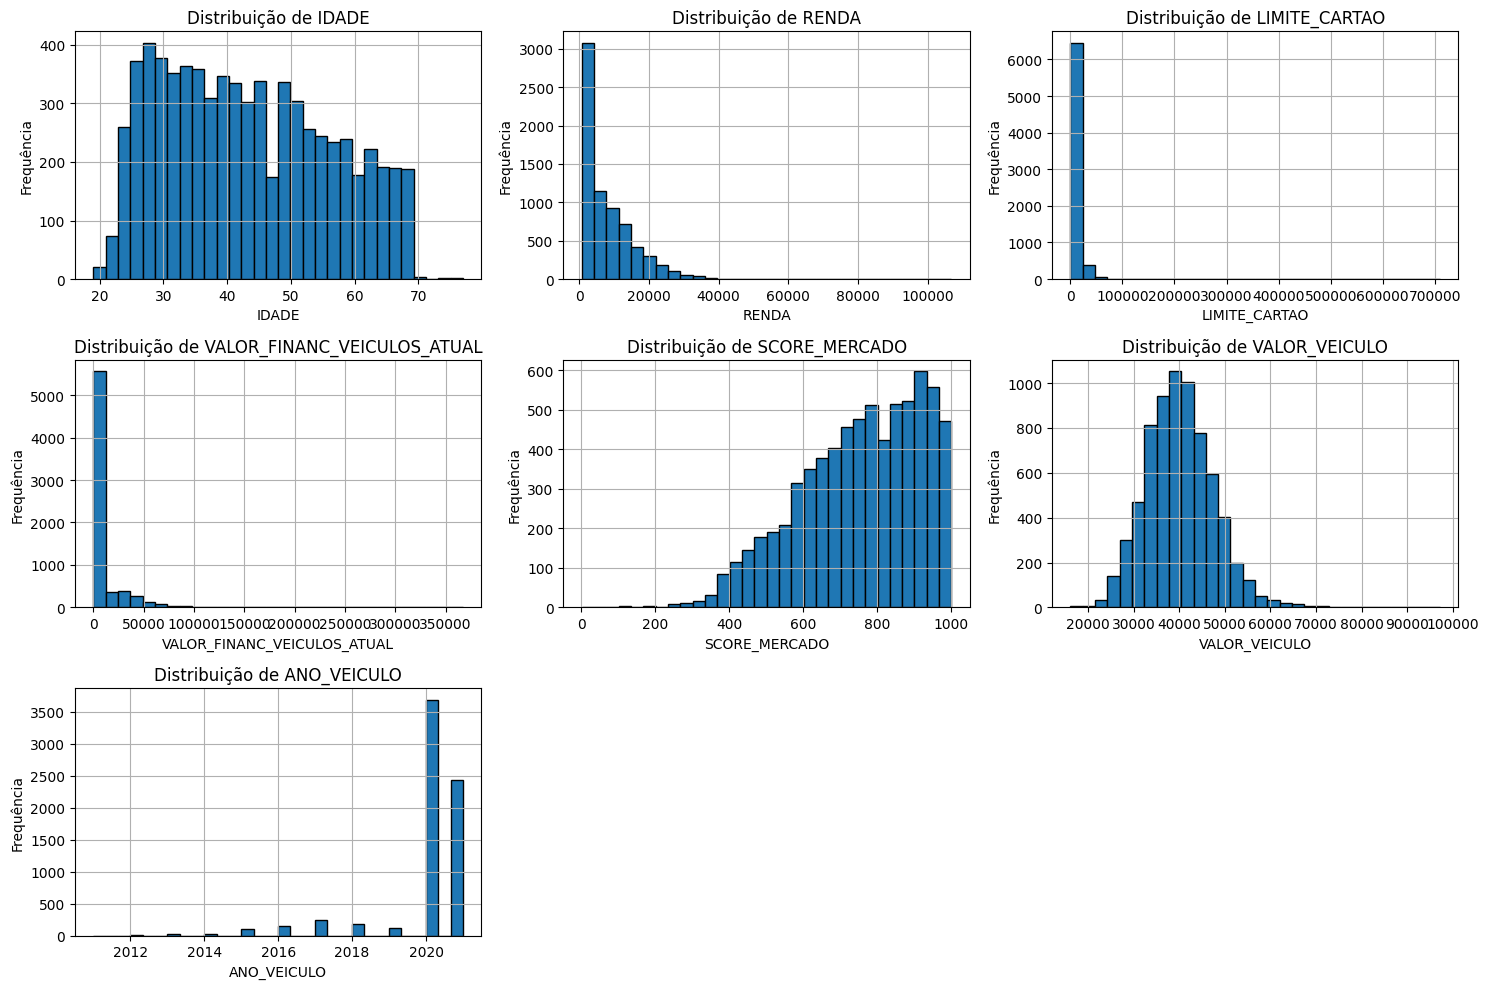

In [ ]:
#df['VALOR_VEICULO'] = df['VALOR_VEICULO'].str.replace(',', '.').astype(float)
numerical_columns = ['IDADE', 'RENDA', 'LIMITE_CARTAO', 'VALOR_FINANC_VEICULOS_ATUAL', 'SCORE_MERCADO', 'VALOR_VEICULO', 'ANO_VEICULO']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    ax = axes[i//3, i%3]
    df[col].hist(bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')

for j in range(i+1, 9):
    fig.delaxes(axes[j//3, j%3])

plt.tight_layout()
plt.show()

**Idade**: A maioria dos clientes está entre 30 e 50 anos, com uma concentração maior na faixa de 30 a 40.

**Renda**: A distribuição é bastante assimétrica, com a maioria dos clientes apresentando uma renda abaixo de 20.000, mas há alguns com rendas bem mais altas.

**Limite do Cartão de Crédito**: A maioria dos clientes tem um limite abaixo de 20.000, mas há limites muito altos, indicando possíveis outliers.

**Valor de Financiamento de Veículos Atual**: A maioria dos clientes parece ter financiamentos com valores mais baixos, e há financiamentos muito altos (outliers).

**Score de Crédito**: A maioria dos clientes tem um score de crédito entre 600 e 800.

**Valor do Veículo**: A distribuição mostra que a maioria dos veículos financiados está na faixa entre 20.000 e 40.000.

**Ano do Veículo**: A maior parte dos veículos financiados é recente, com anos próximos a 2020.




## A target
 Vamos dar uma atenção maior para a **target_M3OVER30**, porém olhando ainda as outras variáveis.

1. A correlação com **IDADE** é levemente negativa (-0.01), o que sugere que a idade **não** tem uma relação linear forte com a inadimplência.

2. A correlação com **RENDA** é muito baixa (0.06), indicando que a renda **não** influencia fortemente a inadimplência.

3. **LIMITE_CARTAO** tem uma correlação** um pouco mais** significativa (0.10), o que sugere que clientes com maior limite de cartão de crédito podem ter uma **leve tendência** a estar inadimplentes.

4. **VALOR_FINANC_VEICULOS_ATUAL** tem uma correlação muito baixa (0.02) com a inadimplência, sugerindo pouca ou quase nenhuma relação linear.

5. **SCORE_MERCADO** tem uma correlação negativa ligeiramente mais alta (-0.08), o que faz sentido, pois um score de crédito mais alto geralmente está associado a menor probabilidade de inadimplência.

6. **VALOR_VEICULO** e **ANO_VEICULO** também mostram correlação muito baixa com a inadimplência.

## Novas variáveis

A fim de aprofundar a análise e melhorar o modelo.

1. RAZAO_FINANCIAMENTO_RENDA: Esta variável calcula quanto do valor do financiamento representa em relação à renda do cliente. Um valor maior pode indicar que o cliente está assumindo um financiamento que consome uma parte maior de sua capacidade financeira.

2. INTERACAO_IDADE_VALOR: Aqui estamos multiplicando a idade pelo valor financiado. Isso pode capturar como a relação entre idade e o valor do financiamento pode influenciar a inadimplência.

3. INTERACAO_RENDA_LIMITE: Interação entre a renda do cliente e o limite de cartão. Isso pode ajudar a entender se clientes com alta renda e alto limite de cartão têm um comportamento de crédito diferente.

4. RAZAO_LIMITE_RENDA: Esta variável avalia o quanto do limite do cartão o cliente tem em relação à sua renda. Isso pode indicar a flexibilidade financeira do cliente.

In [ ]:
# 1. Razão entre o Valor Financiado e a Renda
df['RAZAO_FINANCIAMENTO_RENDA'] = df['VALOR_FINANC_VEICULOS_ATUAL'] / df['RENDA']

# 2. Interação entre Idade e Valor do Financiamento
df['INTERACAO_IDADE_VALOR'] = df['IDADE'] * df['VALOR_FINANC_VEICULOS_ATUAL']

# 3. Interação entre Renda e Limite de Cartão
df['INTERACAO_RENDA_LIMITE'] = df['RENDA'] * df['LIMITE_CARTAO']

# 4. Razão entre Limite de Cartão e Renda
df['RAZAO_LIMITE_RENDA'] = df['LIMITE_CARTAO'] / df['RENDA']

# Verificar as primeiras linhas do dataframe para garantir que as novas variáveis foram criadas corretamente
df[['RAZAO_FINANCIAMENTO_RENDA', 'INTERACAO_IDADE_VALOR', 'INTERACAO_RENDA_LIMITE', 'RAZAO_LIMITE_RENDA']].head()

,RAZAO_FINANCIAMENTO_RENDA,INTERACAO_IDADE_VALOR,INTERACAO_RENDA_LIMITE,RAZAO_LIMITE_RENDA
0,0.000000,0.000000e+00,1.016835e+08,4.487748
1,0.000000,0.000000e+00,1.113827e+07,3.854074
2,7.304132,9.358984e+05,5.137841e+07,3.204501
3,9.111925,4.353222e+06,1.378384e+08,0.918540
4,0.000000,0.000000e+00,1.995770e+07,6.159783


### Distribuição das novas variáveis


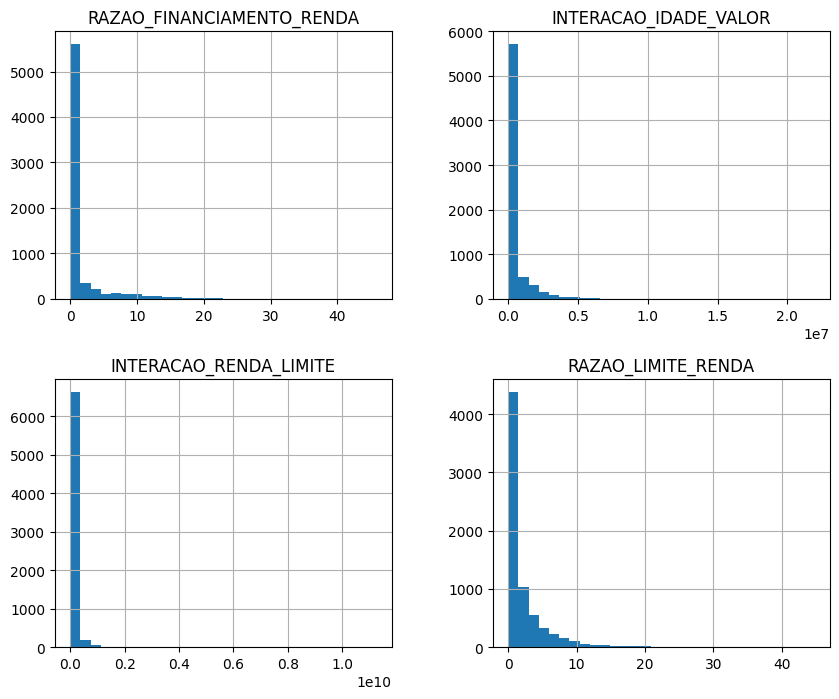

In [ ]:
df[['RAZAO_FINANCIAMENTO_RENDA', 'INTERACAO_IDADE_VALOR', 'INTERACAO_RENDA_LIMITE', 'RAZAO_LIMITE_RENDA']].hist(bins=30, figsize=(10, 8))
plt.show()

1. **RAZAO_FINANCIAMENTO_RENDA**:
A maioria dos valores está concentrada perto de 0, o que significa que, para a maioria dos clientes, o valor do financiamento representa uma parte pequena da renda. No entanto, há alguns clientes onde essa razão é bem maior (outliers), indicando que o financiamento está comprometendo uma parte significativa da renda;

2. **INTERACAO_IDADE_VALOR**: A distribuição é bastante concentrada no valor mais baixo, com uma cauda longa. Isso sugere que, para muitos clientes, a interação entre idade e valor do financiamento é baixa, mas há alguns casos de clientes com financiamentos altos em idades específicas;

3. **INTERACAO_RENDA_LIMITE**: Novamente, a maioria dos clientes tem uma interação baixa entre a renda e o limite de cartão, mas há alguns casos extremos. Isso pode indicar que alguns clientes têm renda alta e também limites elevados no cartão de crédito, o que pode influenciar seu comportamento de crédito;

4. **RAZAO_LIMITE_RENDA**: A maioria dos clientes tem uma razão entre o limite de cartão e a renda concentrada perto de valores baixos, mas há alguns casos onde essa razão é significativamente alta. Isso pode sugerir que alguns clientes têm um limite de cartão bem elevado em relação à sua renda, o que pode representar um risco financeiro;

5. Distribuições assimétricas: Todas as variáveis têm uma distribuição altamente concentrada nos valores mais baixos, com caudas longas. Isso pode ser resultado de outliers ou de diferenças significativas entre os perfis de clientes.

## Perfil dos clientes que foram aprovados no financiamento de veículo

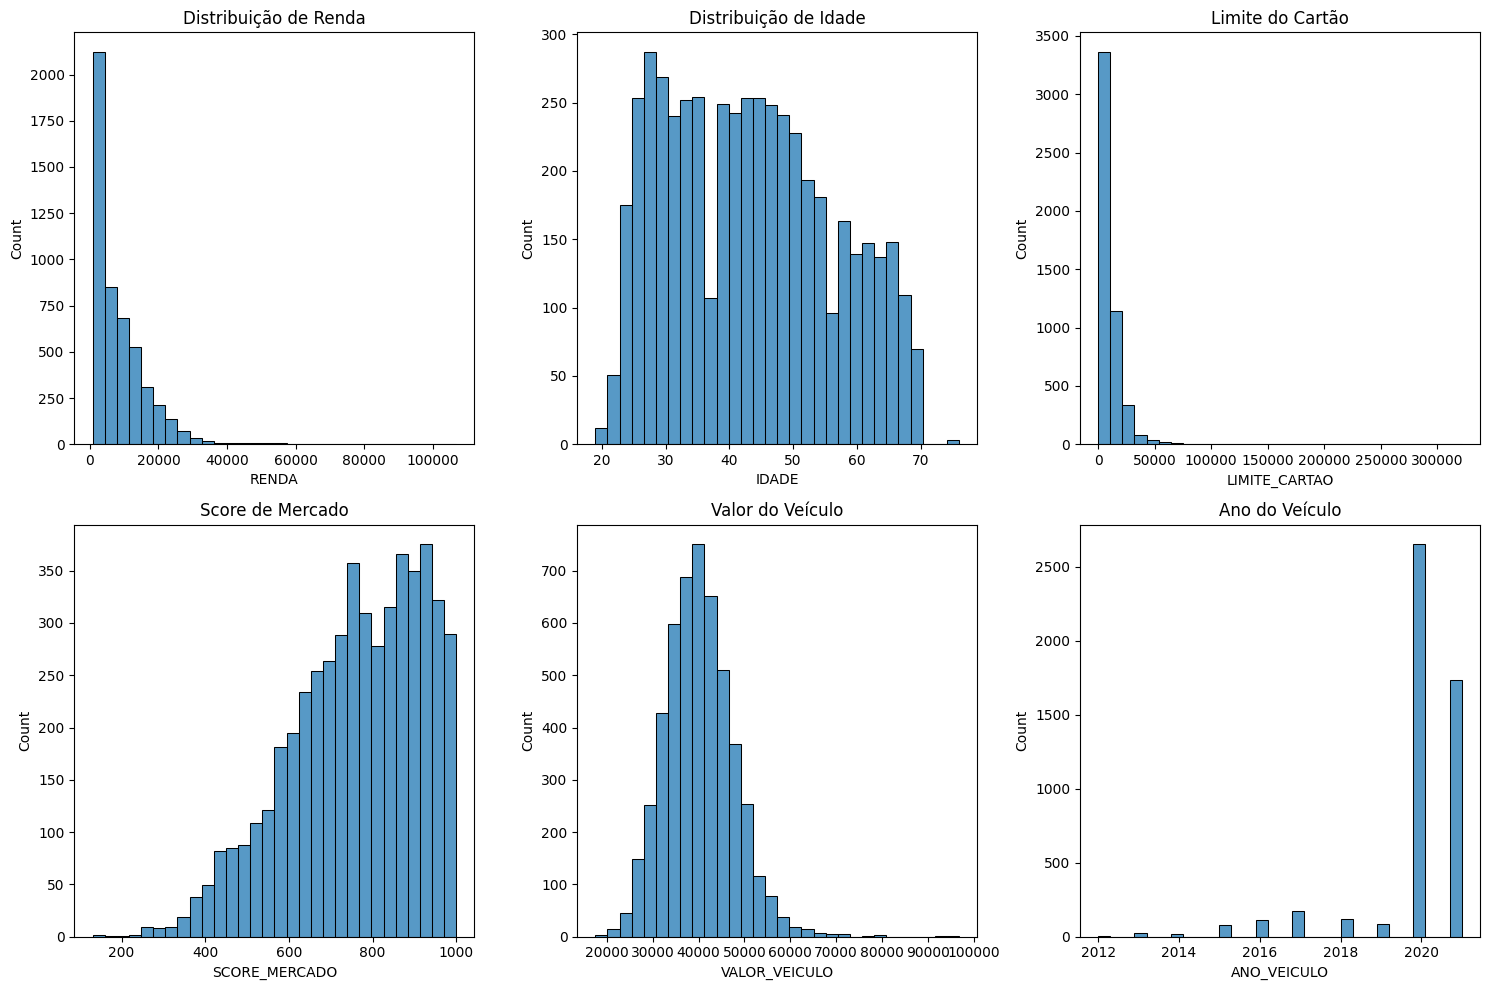

Perfil Típico dos Clientes Aprovados:
RENDA             5794.928340
IDADE               42.000000
LIMITE_CARTAO     6246.354104
SCORE_MERCADO      777.640619
VALOR_VEICULO    39842.900000
ANO_VEICULO       2020.000000
dtype: float64


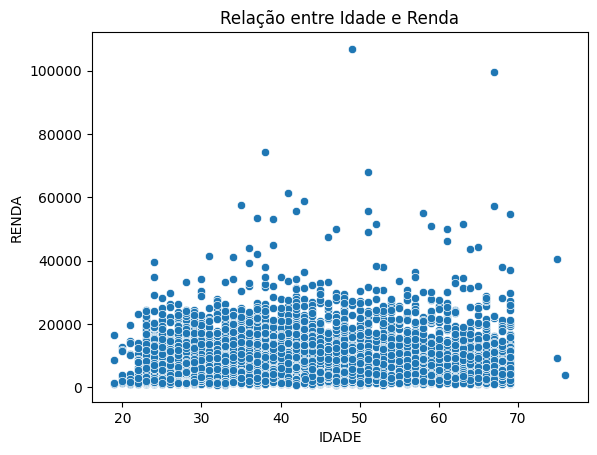

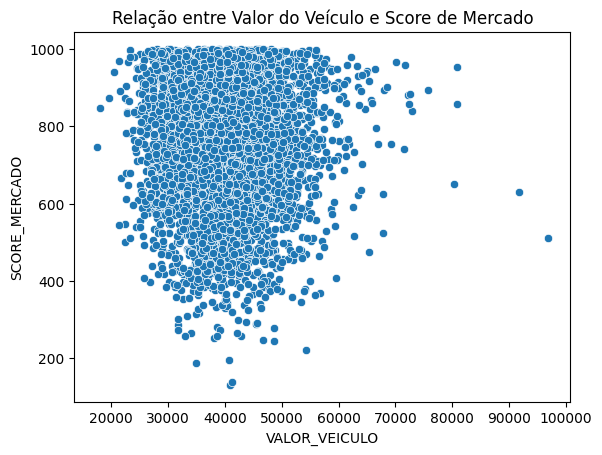

In [ ]:
clientes_aprovados = df[df['TARGET_M3OVER30'] == 0]

# Estatísticas descritivas das variáveis relevantes
clientes_aprovados[['RENDA', 'IDADE', 'LIMITE_CARTAO', 'SCORE_MERCADO',
                    'VALOR_VEICULO', 'ANO_VEICULO']].describe()

# Histogramas para as principais variáveis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(clientes_aprovados['RENDA'], bins=30, ax=axes[0, 0]).set_title('Distribuição de Renda')
sns.histplot(clientes_aprovados['IDADE'], bins=30, ax=axes[0, 1]).set_title('Distribuição de Idade')
sns.histplot(clientes_aprovados['LIMITE_CARTAO'], bins=30, ax=axes[0, 2]).set_title('Limite do Cartão')
sns.histplot(clientes_aprovados['SCORE_MERCADO'], bins=30, ax=axes[1, 0]).set_title('Score de Mercado')
sns.histplot(clientes_aprovados['VALOR_VEICULO'], bins=30, ax=axes[1, 1]).set_title('Valor do Veículo')
sns.histplot(clientes_aprovados['ANO_VEICULO'], bins=30, ax=axes[1, 2]).set_title('Ano do Veículo')

plt.tight_layout()
plt.show()

# Perfil típico dos clientes aprovados
perfil_tipico = clientes_aprovados[['RENDA', 'IDADE', 'LIMITE_CARTAO', 'SCORE_MERCADO',
                                    'VALOR_VEICULO', 'ANO_VEICULO']].median()
print("Perfil Típico dos Clientes Aprovados:")
print(perfil_tipico)

sns.scatterplot(data=clientes_aprovados, x='IDADE', y='RENDA')
plt.title('Relação entre Idade e Renda')
plt.show()

# Relação entre Valor do Veículo e Score de Mercado
sns.scatterplot(data=clientes_aprovados, x='VALOR_VEICULO', y='SCORE_MERCADO')
plt.title('Relação entre Valor do Veículo e Score de Mercado')
plt.show()

### Perfil dos Clientes Típico

* Renda Mediana: R$5.794,92

* Idade Mediana: 42 anos

* Limite do Cartão: R$6.246,35

* Score de Mercado: 777,6

* Valor do Veículo: R$39.842,00

* Ano do Veículo: 2020

O perfil típico dos clientes aprovados no financiamento de veículos é de pessoas com idade mediana de 42 anos, renda moderada (cerca de 5.794,00), score de crédito entre 700 e 800, e que preferem veículos recentes com valor em torno de R$40.000.

Essas conclusões indicam que o público aprovado é composto principalmente por pessoas de meia-idade, com bom histórico de crédito e renda moderada, e que optam por veículos relativamente novos e de valor intermediário. Além disso, a análise sugere que a instituição financeira adota critérios conservadores na aprovação, priorizando clientes com perfil de menor risco.

## Clientes Inadimplentes

In [ ]:
clientes_inadimplentes = df[df['TARGET_M3OVER30'] == 1]
clientes_inadimplentes

,CLIENTE,DATA_FINANCIAMENTO,TARGET_M3OVER30,IDADE,ESTADO,RENDA,LIMITE_CARTAO,VALOR_FINANC_VEICULOS_ATUAL,SCORE_MERCADO,VALOR_VEICULO,ANO_VEICULO,RAZAO_FINANCIAMENTO_RENDA,INTERACAO_IDADE_VALOR,INTERACAO_RENDA_LIMITE,RAZAO_LIMITE_RENDA
0,0,2021-10,1,25.0,SP,4760.043944,21361.878421,0.000000,882.238536,27802.51,2020.0,0.000000,0.000000e+00,1.016835e+08,4.487748
1,1,2021-11,1,27.0,CE,1700.000000,6551.924996,0.000000,956.692365,34525.51,2020.0,0.000000,0.000000e+00,1.113827e+07,3.854074
2,2,2021-10,1,32.0,RJ,4004.147555,12831.296653,29246.823466,610.724337,36178.14,2020.0,7.304132,9.358984e+05,5.137841e+07,3.204501
3,3,2021-12,1,39.0,CE,12250.000000,11252.113450,111621.080000,815.069341,38681.99,2020.0,9.111925,4.353222e+06,1.378384e+08,0.918540
5,5,2021-10,1,27.0,SP,1100.000000,0.000000,0.000000,963.743769,42068.13,2020.0,0.000000,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,6991,2021-10,1,32.0,SP,10775.692285,0.000000,0.000000,862.866385,39190.90,2020.0,0.000000,0.000000e+00,0.000000e+00,0.000000
6992,6992,2021-10,1,35.0,PR,1850.000000,1527.560000,0.000000,718.162390,44744.46,2021.0,0.000000,0.000000e+00,2.825986e+06,0.825708
6994,6994,2021-11,1,29.0,SP,2400.000000,19603.560000,53749.550000,815.127757,58317.54,2018.0,22.395646,1.558737e+06,4.704854e+07,8.168150
6995,4588,2021-11,1,37.0,SC,20728.584790,17490.004917,63571.250171,719.000000,41896.12,2021.0,3.066840,2.352136e+06,3.625430e+08,0.843763


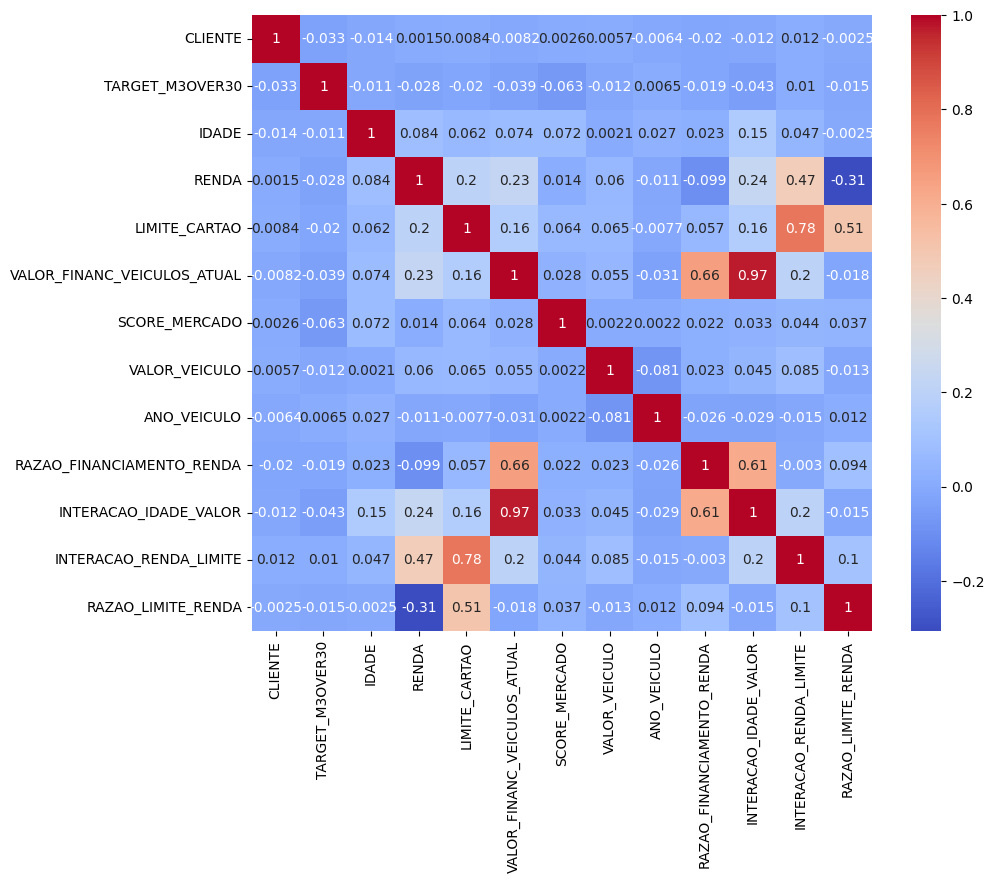

In [ ]:
df['DATA_FINANCIAMENTO'] = pd.to_datetime(df['DATA_FINANCIAMENTO'], errors='coerce')

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numerical_columns].corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura, se necessário
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Observações principais com a nossa target

**Idade**: Correlação negativa de -0.11 com TARGET_M3OVER30, indicando que clientes mais jovens tendem a ser mais propensos à inadimplência (quanto menor a idade, maior a chance de inadimplência);

**Renda**: Correlação fraca e negativa (-0.028) com TARGET_M3OVER30. Isso indica que, no geral, a renda não tem uma correlação forte com a inadimplência, mas uma leve tendência de que clientes com rendas mais baixas sejam mais arriscados;

**Limite de Cartão**: Correlação negativa de -0.02 com a inadimplência, o que sugere que clientes com limites de cartão mais altos têm uma probabilidade um pouco menor de serem inadimplentes;

**Valor Financiado do Veículo Atual**: Correlação fraca de -0.04. Isso indica que o valor do financiamento atual também não afeta fortemente a probabilidade de inadimplência, embora a correlação seja levemente negativa

**Score de Mercad**o: Correlação de -0.083, sugerindo que um score de crédito mais alto está associado a uma probabilidade menor de inadimplência, o que faz sentido, mas a correlação é relativamente baixa.

## Correlação entre as variáveis preditivas

**Limite de Cartão e Renda**: A correlação de 0.23 sugere uma associação razoável entre a renda e o limite de cartão, o que é esperado, uma vez que instituições financeiras tendem a ajustar o limite de crédito com base na capacidade financeira do cliente.

**Valor Financiado e Limite de Cartão**: A correlação de 0.12 entre essas duas variáveis indica que há uma leve relação entre o valor financiado e o limite de cartão do cliente, mas não é uma correlação forte.

**Idade e Score de Mercado**: Correlação de 0.22, sugerindo que clientes mais velhos tendem a ter um score de crédito um pouco mais elevado.

## As variáveis mais importantes

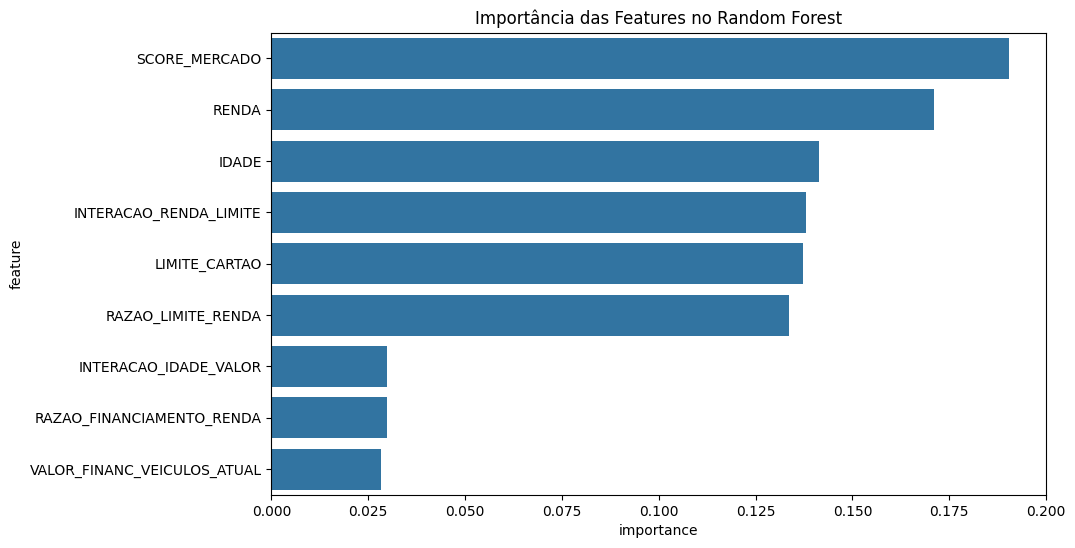

In [ ]:
# Extraindo a importância das features no modelo Random Forest
importances = random_forest_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Features no Random Forest')
plt.show()

**SCORE_MERCADO**:

1. Importância: Essa é a variável mais importante no modelo.
   
  
2. Interpretação: O score de crédito é um indicador crucial de inadimplência, o que faz sentido, pois ele reflete diretamente o histórico de comportamento financeiro do cliente. Quanto mais baixo o score, maior o risco de inadimplência.

**RENDA**:

1. Importância: A segunda variável mais importante.
2. Interpretação: A renda do cliente tem uma alta influência no risco de inadimplência. Clientes com rendas mais baixas são mais vulneráveis a inadimplência, especialmente quando o financiamento representa uma parte significativa de sua capacidade financeira.

**IDADE**:

1. Importância: A idade é a terceira variável mais relevante.
2. Interpretação: Clientes mais jovens tendem a ser mais propensos a inadimplência, conforme mostrado pela correlação negativa com a variável alvo.

**INTERACAO_RENDA_LIMITE**:

1. Importância: A interação entre renda e limite de cartão é altamente relevante.
2. Interpretação: Clientes com uma relação de alta renda e limite de cartão podem apresentar diferentes comportamentos de crédito. Essa variável captura esse comportamento e tem um impacto significativo no risco de inadimplência.

**LIMITE_CARTAO**:

1. Importância: O limite do cartão de crédito é também uma variável importante.
2. Interpretação: Limites de crédito elevados podem ser indicadores de crédito excessivo, especialmente quando desproporcionais à renda do cliente. Um limite alto pode significar que o cliente tem maior flexibilidade financeira, mas também pode indicar uso excessivo de crédito.

Obs.: O valor financiado, por si só, não parece ser um forte preditor de inadimplência, mas pode complementar outras variáveis.

# Modelos e Métricas

Vou separar a variável alvo **TARGET_M3OVER30** das variáveis explicativas, depois vou vividir os dados em treino (80% dos dados) e teste (20% dos dados).

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Melhores Parâmetros Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       622
           1       0.59      0.60      0.59       578

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200


Treinando e avaliando o modelo: Regressão Logística (Mediana)


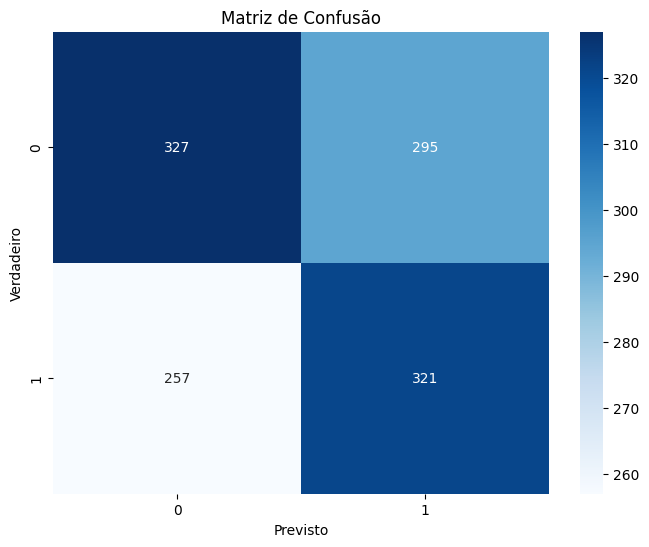

Métricas de Treino
Acurácia: 0.5586
Precisão: 0.5667
Revocação: 0.5556
Medida F1: 0.5611
ROC AUC: 0.5751
PR AUC: 0.5801

Métricas de Teste
Acurácia: 0.5400
Precisão: 0.5211
Revocação: 0.5554
Medida F1: 0.5377
ROC AUC: 0.5533
PR AUC: 0.5384

Treinando e avaliando o modelo: Regressão Logística (KNN)


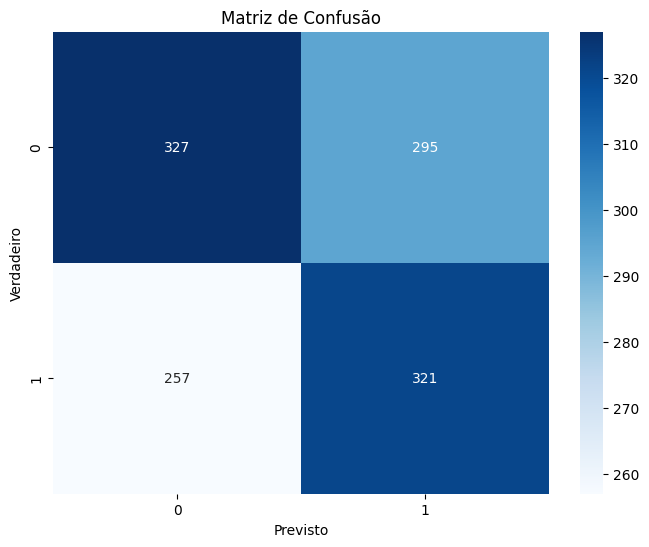

Métricas de Treino
Acurácia: 0.5586
Precisão: 0.5667
Revocação: 0.5556
Medida F1: 0.5611
ROC AUC: 0.5751
PR AUC: 0.5801

Métricas de Teste
Acurácia: 0.5400
Precisão: 0.5211
Revocação: 0.5554
Medida F1: 0.5377
ROC AUC: 0.5533
PR AUC: 0.5384

Treinando e avaliando o modelo: XGBoost


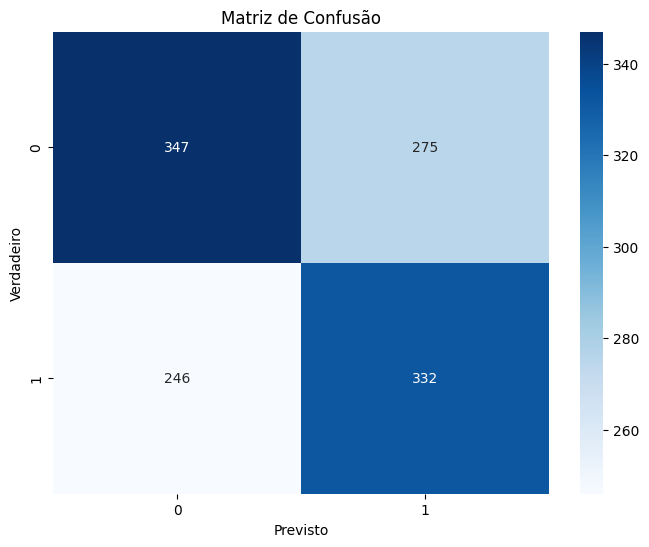

Métricas de Treino
Acurácia: 0.9207
Precisão: 0.9304
Revocação: 0.9121
Medida F1: 0.9212
ROC AUC: 0.9793
PR AUC: 0.9802

Métricas de Teste
Acurácia: 0.5658
Precisão: 0.5470
Revocação: 0.5744
Medida F1: 0.5603
ROC AUC: 0.6139
PR AUC: 0.6105

Treinando e avaliando o modelo: LightGBM
[LightGBM] [Info] Number of positive: 1422, number of negative: 1378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507857 -> initscore=0.031431
[LightGBM] [Info] Start training from score 0.031431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

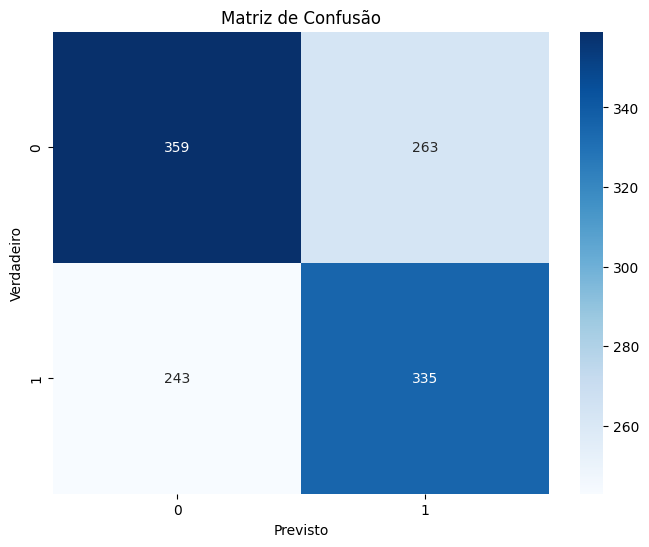

Métricas de Treino
Acurácia: 0.8932
Precisão: 0.9114
Revocação: 0.8748
Medida F1: 0.8927
ROC AUC: 0.9634
PR AUC: 0.9651

Métricas de Teste
Acurácia: 0.5783
Precisão: 0.5602
Revocação: 0.5796
Medida F1: 0.5697
ROC AUC: 0.6169
PR AUC: 0.6082


In [ ]:
# Função para treinar e avaliar o modelo
def metricas_treino_e_teste(modelo, X_train, X_test, y_train, y_test):
    y_pred_train = modelo.predict(X_train)
    y_pred_proba_train = modelo.predict_proba(X_train)[:, 1]
    y_pred_test = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
    precisions_train, recalls_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
    pr_auc_train = auc(recalls_train, precisions_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    precisions_test, recalls_test, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc_test = auc(recalls_test, precisions_test)

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.title('Matriz de Confusão')
    plt.show()

    # Exibir métricas
    print("Métricas de Treino")
    print(f'Acurácia: {accuracy_train:.4f}')
    print(f'Precisão: {precision_train:.4f}')
    print(f'Revocação: {recall_train:.4f}')
    print(f'Medida F1: {f1_train:.4f}')
    print(f'ROC AUC: {roc_auc_train:.4f}')
    print(f'PR AUC: {pr_auc_train:.4f}\n')

    print("Métricas de Teste")
    print(f'Acurácia: {accuracy_test:.4f}')
    print(f'Precisão: {precision_test:.4f}')
    print(f'Revocação: {recall_test:.4f}')
    print(f'Medida F1: {f1_test:.4f}')
    print(f'ROC AUC: {roc_auc_test:.4f}')
    print(f'PR AUC: {pr_auc_test:.4f}')

# Aplicar undersampling para balanceamento
data_majority = df[df['TARGET_M3OVER30'] == 0]
data_minority = df[df['TARGET_M3OVER30'] == 1]
data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=42)
data_balanced = pd.concat([data_majority_downsampled, data_minority])

# Preparar os dados balanceados
X_balanced = data_balanced.drop(columns=['TARGET_M3OVER30', 'CLIENTE', 'DATA_FINANCIAMENTO'])
y_balanced = data_balanced['TARGET_M3OVER30']
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Configuração do GridSearchCV para Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 8, None], 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train_bal, y_train_bal)

# Exibir os melhores parâmetros
print("Melhores Parâmetros Random Forest:", grid_search.best_params_)

# Avaliar o desempenho do melhor modelo Random Forest
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_bal)
print(classification_report(y_test_bal, y_pred_rf))

# Definir os demais modelos com pipelines
modelos = {
    'Regressão Logística (Mediana)': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, C=0.1, penalty='l2', class_weight='balanced'))
    ]),
    'Regressão Logística (KNN)': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, C=0.1, penalty='l2', class_weight='balanced'))
    ]),
    'XGBoost': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(
            n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8,
            colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('lgb', lgb.LGBMClassifier(
            n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8,
            colsample_bytree=0.8, random_state=42))
    ])
}

# Treinar e avaliar os modelos restantes
for nome, modelo in modelos.items():
    print(f"\nTreinando e avaliando o modelo: {nome}")
    modelo.fit(X_train_bal, y_train_bal)
    metricas_treino_e_teste(modelo, X_train_bal, X_test_bal, y_train_bal, y_test_bal)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


[I 2024-10-12 17:07:17,729] A new study created in memory with name: no-name-8bbb2735-6b1d-462c-bbf5-de9c36989f30
[I 2024-10-12 17:07:17,755] Trial 0 finished with value: -0.019736842105263157 and parameters: {'threshold': 0.7778158493906197}. Best is trial 0 with value: -0.019736842105263157.
[I 2024-10-12 17:07:17,766] Trial 1 finished with value: -0.6666666666666666 and parameters: {'threshold': 0.27736462724938393}. Best is trial 1 with value: -0.6666666666666666.
[I 2024-10-12 17:07:17,786] Trial 2 finished with value: -0.6666666666666666 and parameters: {'threshold': 0.20268660201152314}. Best is trial 1 with value: -0.6666666666666666.
[I 2024-10-12 17:07:17,820] Trial 3 finished with value: -0.575197889182058 and parameters: {'threshold': 0.4684845973133739}. Best is trial 1 with value: -0.6666666666666666.
[I 2024-10-12 17:07:17,840] Trial 4 finished with value: -0.6666666666666666 and parameters: {'threshold': 0.1808714478972008}. Best is trial 1 with value: -0.66666666666666

Threshold Ótimo: 0.3284134156407903

Relatório de Classificação - Conjunto de Teste (Threshold Otimizado):
              precision    recall  f1-score   support

           0       0.69      0.03      0.06       600
           1       0.50      0.98      0.67       600

    accuracy                           0.51      1200
   macro avg       0.60      0.51      0.37      1200
weighted avg       0.60      0.51      0.37      1200



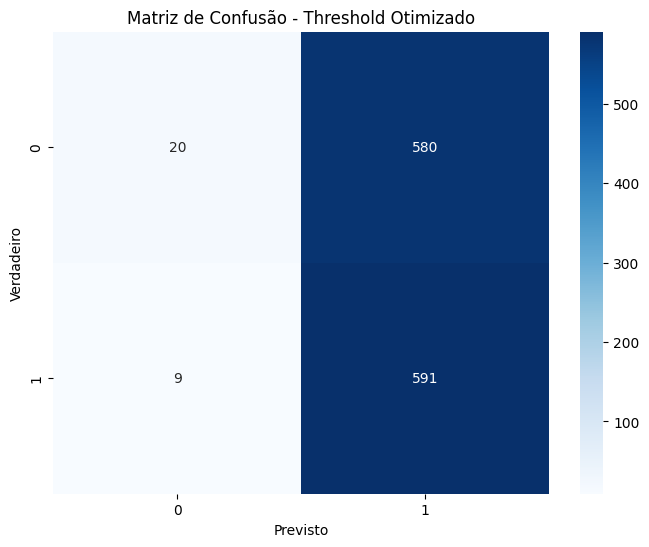

ROC AUC: 0.6292
PR AUC: 0.6233


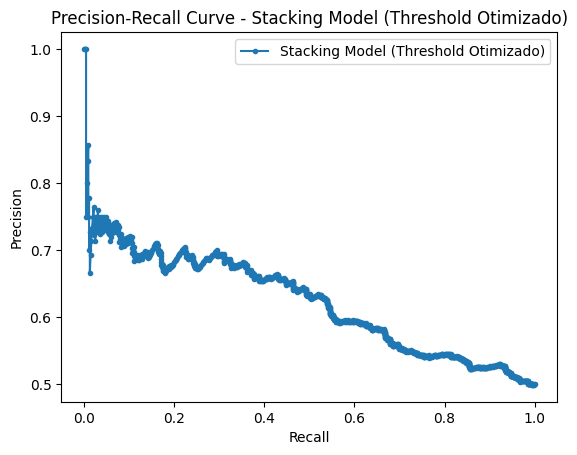

In [ ]:
# 1. Dividindo os dados em treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# 2. Definindo os parâmetros para RandomForest, XGBoost e LightGBM
rf_params = {
    'n_estimators': 400,
    'max_depth': 4,
    'min_samples_split': 8,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'random_state': 42
}

xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'max_depth': 4,
    'min_child_weight': 5,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'alpha': 0.2,
    'lambda': 1.0,
    'scale_pos_weight': len(y_train_bal[y_train_bal == 0]) / len(y_train_bal[y_train_bal == 1]),
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

lgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'max_depth': 4,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'class_weight': 'balanced',
    'random_state': 42
}

# 3. Criando os modelos individuais
rf_model = RandomForestClassifier(**rf_params)
xgb_model = XGBClassifier(**xgb_params)
lgb_model = lgb.LGBMClassifier(**lgb_params)

# 4. Meta-modelo (Regressão Logística) para o Stacking
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# 5. Criando o modelo de Stacking
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=meta_model, cv=5, n_jobs=-1
)

# 6. Treinando o modelo de Stacking
stacking_model.fit(X_train_bal, y_train_bal)

# 7. Previsões no conjunto de teste
y_pred_proba = stacking_model.predict_proba(X_test_bal)[:, 1]

# 8. Função de otimização de threshold com Optuna
def objective(trial):
    threshold = trial.suggest_float('threshold', 0.1, 0.9)
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    return -f1_score(y_test_bal, y_pred_adjusted)  # Negativo para maximizar a F1-Score

# 9. Otimização com Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

optimal_threshold = study.best_params['threshold']
print(f"Threshold Ótimo: {optimal_threshold}")

# 10. Previsões com o Threshold Otimizado
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# 11. Relatório de Classificação
print("\nRelatório de Classificação - Conjunto de Teste (Threshold Otimizado):")
print(classification_report(y_test_bal, y_pred_adjusted))

# 12. Matriz de Confusão com Threshold Otimizado
conf_matrix = confusion_matrix(y_test_bal, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Threshold Otimizado')
plt.show()

# 13. Cálculo das métricas ROC e PR AUC
roc_auc = roc_auc_score(y_test_bal, y_pred_proba)
precisions, recalls, _ = precision_recall_curve(y_test_bal, y_pred_proba)
pr_auc = auc(recalls, precisions)

print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')

# 14. Plot da Curva Precision-Recall
plt.figure()
plt.plot(recalls, precisions, marker='.', label='Stacking Model (Threshold Otimizado)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Stacking Model (Threshold Otimizado)')
plt.legend()
plt.show()

## Buscando equilíbrio entre Recall e Precision

Undersampling para Balanceamento:
 eduzimos a classe majoritária para equilibrar o dataset e evitar viés do modelo.
Regularização nos Modelos:

Adicionamos regularização L1 e L2 para melhorar a estabilidade do modelo e evitar overfitting.

Validação Cruzada com StratifiedKFold: A validação cruzada garante que o modelo generaliza bem para diferentes amostras dos dados.
Threshold Ajustado com F1-Score:

Usamos o F1-Score (beta=1) para encontrar o melhor equilíbrio entre precisão e recall.

Threshold Ótimo para F1-Score: 0.41

Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.69      0.28      0.40       400
           1       0.55      0.88      0.67       400

    accuracy                           0.58       800
   macro avg       0.62      0.58      0.53       800
weighted avg       0.62      0.58      0.53       800



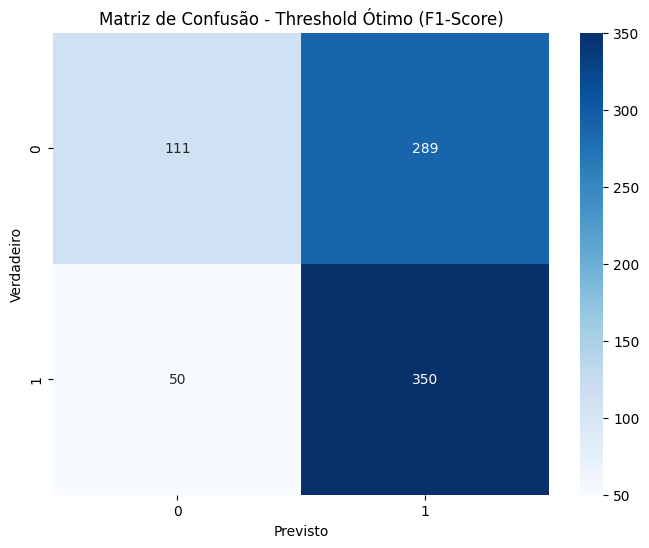

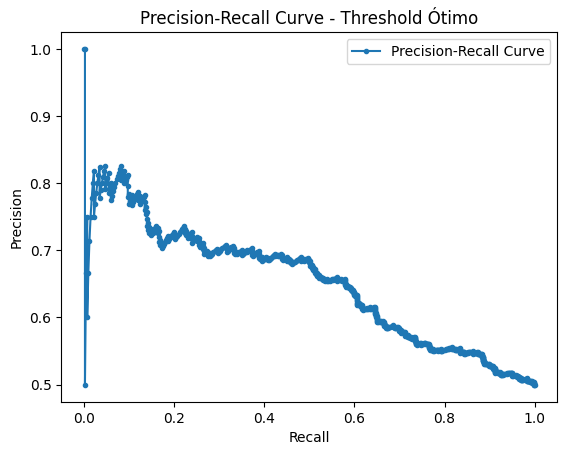

Threshold Ótimo para F1-Score: 0.37

Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.81      0.05      0.10       400
           1       0.51      0.99      0.67       400

    accuracy                           0.52       800
   macro avg       0.66      0.52      0.39       800
weighted avg       0.66      0.52      0.39       800



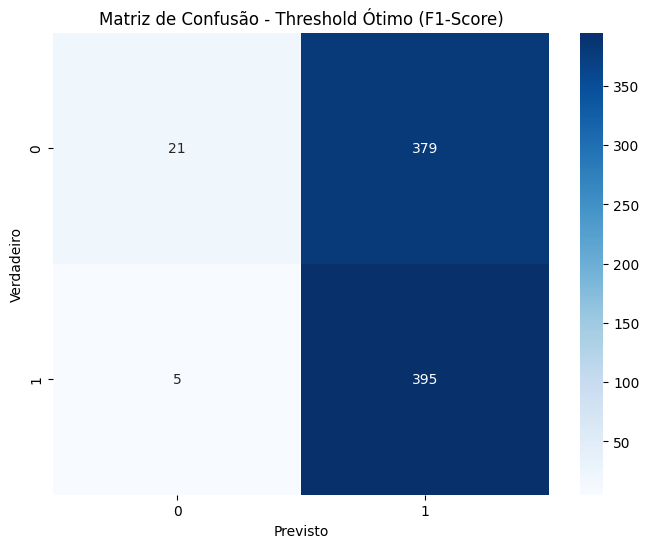

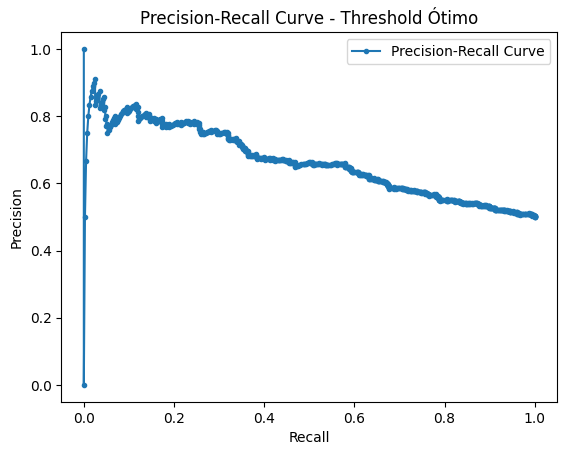

Threshold Ótimo para F1-Score: 0.35

Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.74      0.06      0.11       400
           1       0.51      0.98      0.67       400

    accuracy                           0.52       800
   macro avg       0.63      0.52      0.39       800
weighted avg       0.63      0.52      0.39       800



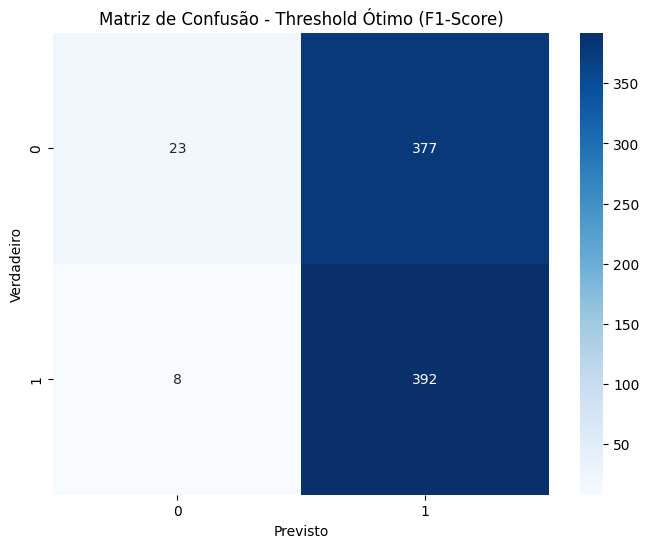

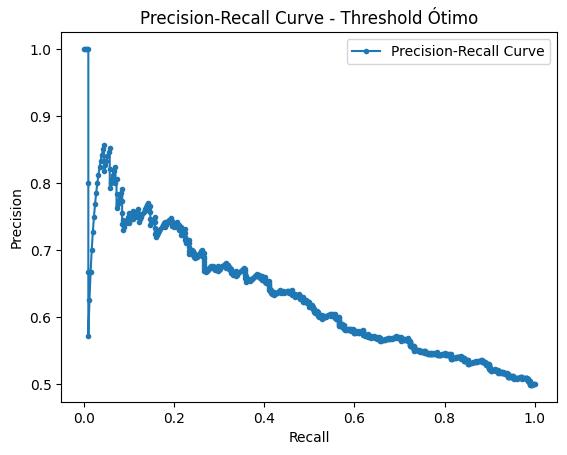

Threshold Ótimo para F1-Score: 0.33

Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       400
           1       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.75      0.50      0.34       800
weighted avg       0.75      0.50      0.34       800



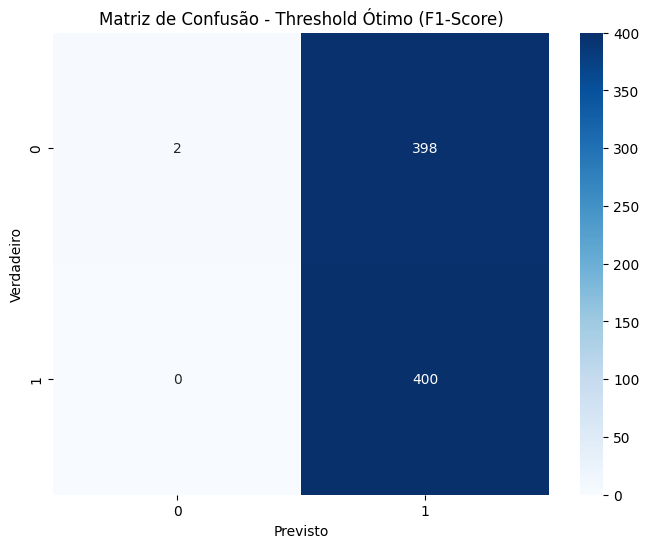

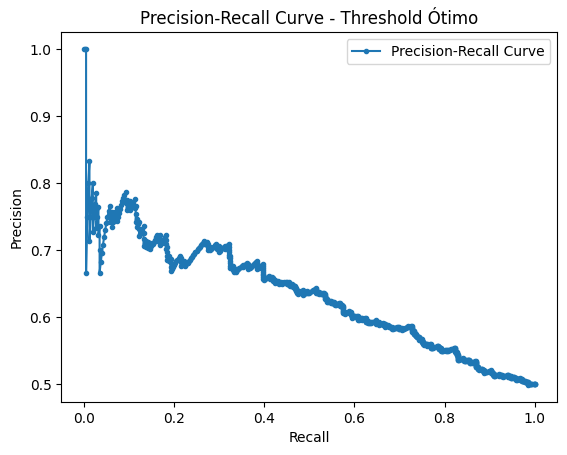

Threshold Ótimo para F1-Score: 0.29

Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800



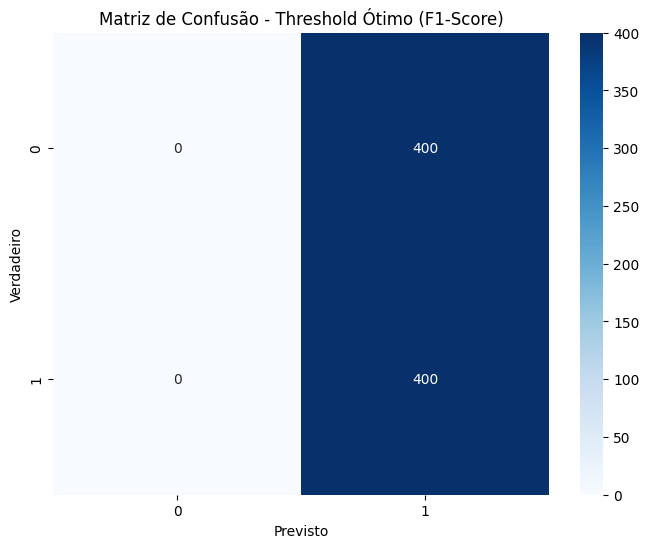

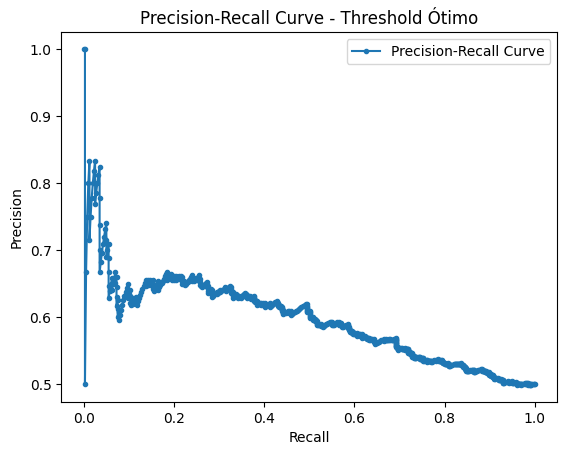

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.under_sampling import RandomUnderSampler


# 1. Aplicando Undersampling para balancear as classes
undersampler = RandomUnderSampler(random_state=42)
X_bal, y_bal = undersampler.fit_resample(X_balanced, y_balanced)

# 2. Função para encontrar o melhor threshold com F1-Score (beta=1)
def find_optimal_threshold_f1(y_true, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    optimal_threshold = thresholds[f1_scores.argmax()]
    print(f"Threshold Ótimo para F1-Score: {optimal_threshold:.2f}")
    return optimal_threshold

# 3. Definindo os parâmetros com regularização para os modelos
rf_params = {
    'n_estimators': 300,
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'random_state': 42
}

xgb_params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,  # L1 Regularização
    'lambda': 1.0,  # L2 Regularização
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

lgb_params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'class_weight': 'balanced',
    'random_state': 42
}

# 4. Criando os modelos com regularização
rf_model = RandomForestClassifier(**rf_params)
xgb_model = XGBClassifier(**xgb_params)
lgb_model = lgb.LGBMClassifier(**lgb_params)

# 5. Configurando o Stacking Model com Validação Cruzada
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=meta_model, cv=5, n_jobs=-1
)

# 6. Validação cruzada para avaliar generalização
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_bal, y_bal):
    X_train, X_test = X_bal.iloc[train_index], X_bal.iloc[test_index]
    y_train, y_test = y_bal.iloc[train_index], y_bal.iloc[test_index]

    # Treinando o Stacking Model
    stacking_model.fit(X_train, y_train)

    # Previsão com probabilidades
    y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

    # Encontrando o threshold ótimo com F1-Score
    optimal_threshold = find_optimal_threshold_f1(y_test, y_pred_proba)

    # Previsão ajustada com o threshold ótimo
    y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

    # Relatório de classificação e matriz de confusão
    print("\nRelatório de Classificação - Threshold F1-Score:")
    print(classification_report(y_test, y_pred_adjusted))

    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.title('Matriz de Confusão - Threshold Ótimo (F1-Score)')
    plt.show()

    # Curva Precision-Recall
    precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Threshold Ótimo')
    plt.legend()
    plt.show()

## Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


Threshold Ótimo para F1-Score: 0.37

Fold 1 - Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.78      0.07      0.13       400
           1       0.51      0.98      0.67       400

    accuracy                           0.53       800
   macro avg       0.65      0.53      0.40       800
weighted avg       0.65      0.53      0.40       800



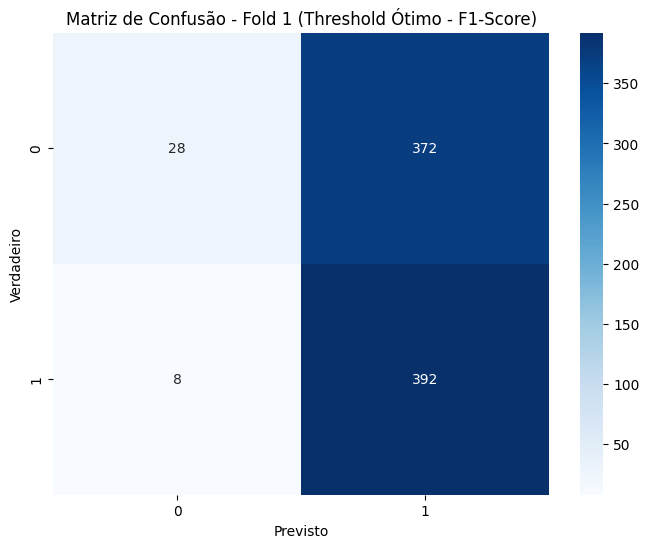

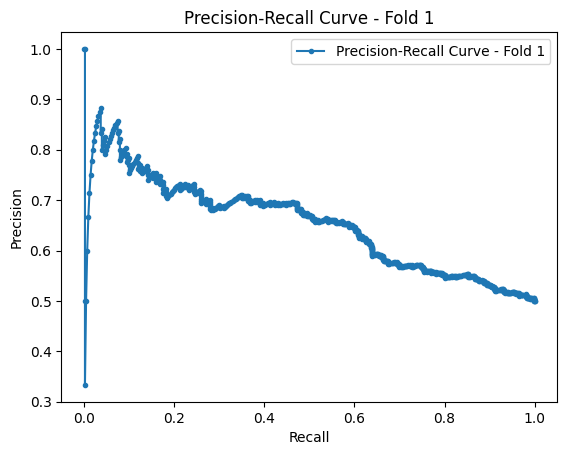

Threshold Ótimo para F1-Score: 0.37

Fold 2 - Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.83      0.06      0.11       400
           1       0.51      0.99      0.67       400

    accuracy                           0.52       800
   macro avg       0.67      0.52      0.39       800
weighted avg       0.67      0.52      0.39       800



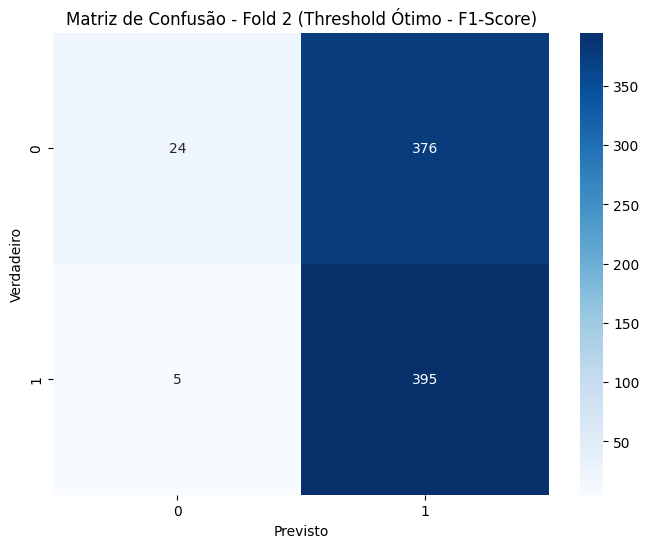

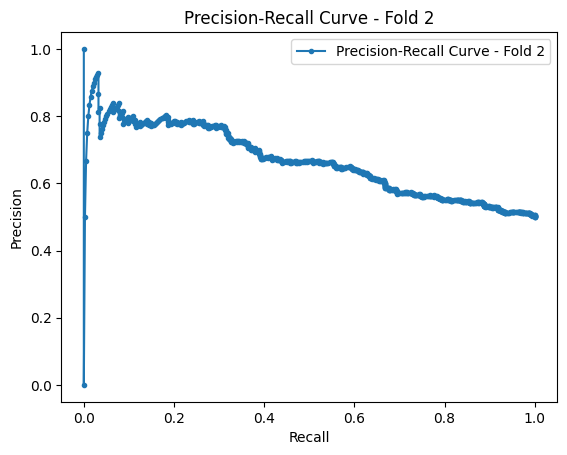

Threshold Ótimo para F1-Score: 0.36

Fold 3 - Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.74      0.07      0.13       400
           1       0.51      0.97      0.67       400

    accuracy                           0.52       800
   macro avg       0.63      0.52      0.40       800
weighted avg       0.63      0.52      0.40       800



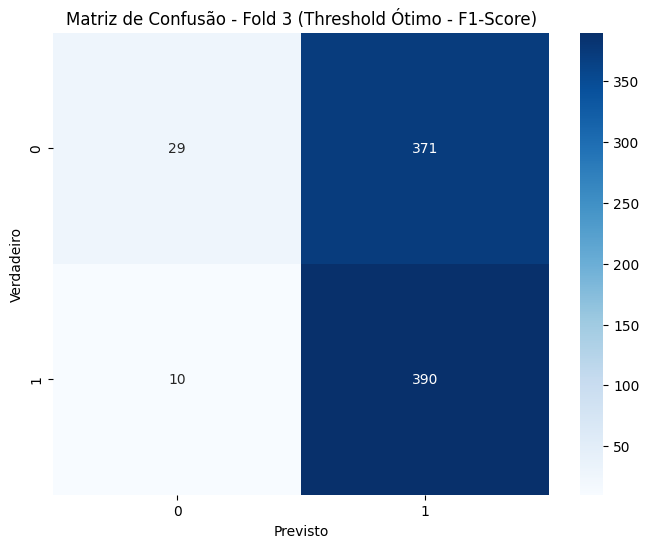

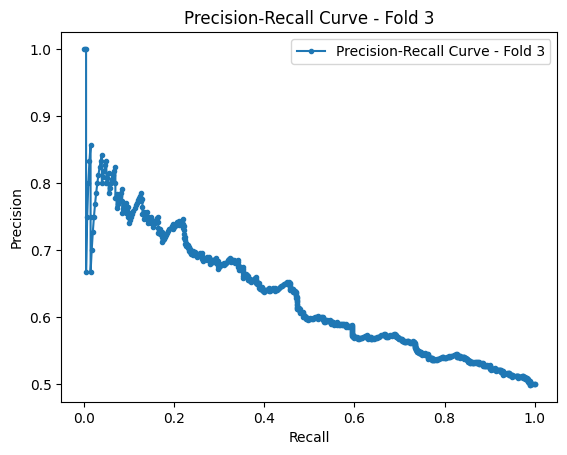

Threshold Ótimo para F1-Score: 0.36

Fold 4 - Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.70      0.07      0.12       400
           1       0.51      0.97      0.67       400

    accuracy                           0.52       800
   macro avg       0.61      0.52      0.39       800
weighted avg       0.61      0.52      0.39       800



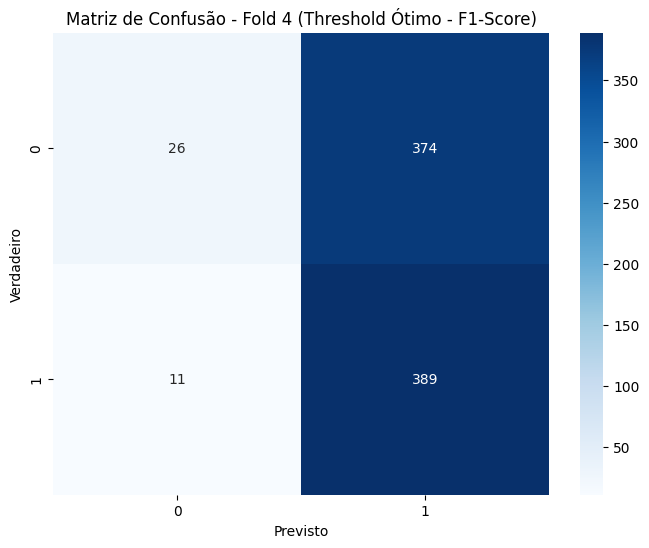

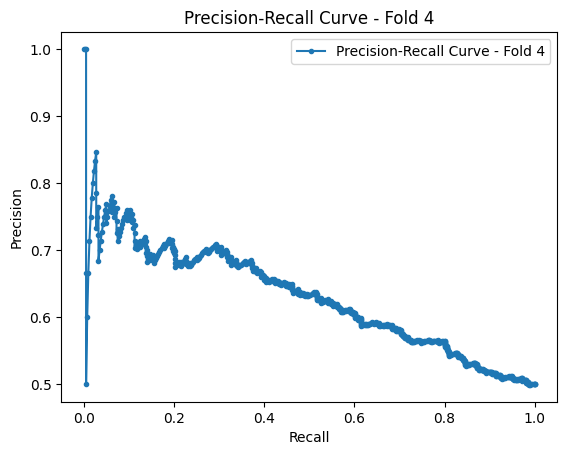

Threshold Ótimo para F1-Score: 0.29

Fold 5 - Relatório de Classificação - Threshold F1-Score:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800



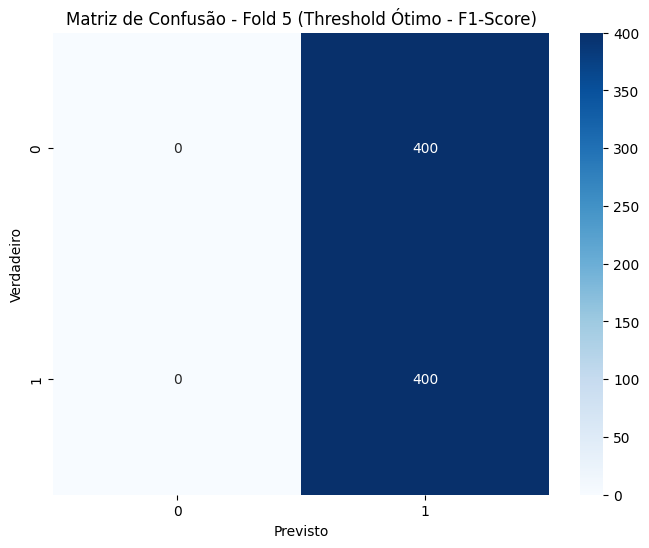

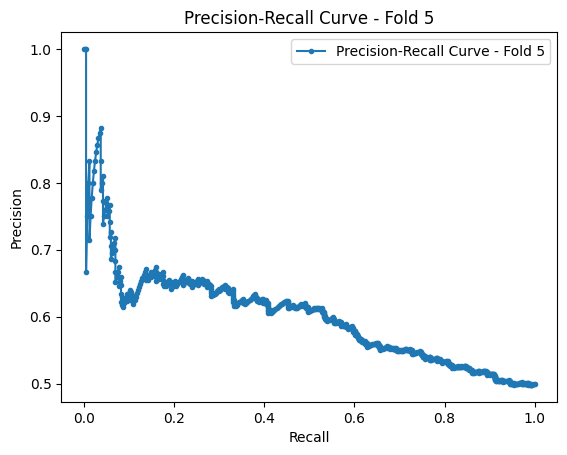

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as

# 1. Aplicando Undersampling para balancear as classes
undersampler = RandomUnderSampler(random_state=42)
X_bal, y_bal = undersampler.fit_resample(X_balanced, y_balanced)

# 2. Definindo os modelos com regularização
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=5,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 Regularization (correção)
    reg_lambda=1.0,  # L2 Regularization (correção)
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

catboost_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.01,
    depth=5,
    verbose=0,
    random_state=42
)

# 3. Configurando o Stacking Model com os três modelos
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('catboost', catboost_model)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# 4. Função para encontrar o melhor threshold com F1-Score
def find_optimal_threshold_f1(y_true, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    optimal_threshold = thresholds[f1_scores.argmax()]
    print(f"Threshold Ótimo para F1-Score: {optimal_threshold:.2f}")
    return optimal_threshold

# 5. Validação Cruzada para Avaliar Generalização e Ajustar Threshold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X_bal, y_bal), 1):
    X_train, X_test = X_bal.iloc[train_index], X_bal.iloc[test_index]
    y_train, y_test = y_bal.iloc[train_index], y_bal.iloc[test_index]

    # Treinando o modelo de Stacking
    stacking_model.fit(X_train, y_train)

    # Previsão com probabilidades
    y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

    # Encontrando o melhor threshold com F1-Score
    optimal_threshold = find_optimal_threshold_f1(y_test, y_pred_proba)

    # Previsão ajustada com o threshold ótimo
    y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

    # Relatório de classificação e matriz de confusão
    print(f"\nFold {fold} - Relatório de Classificação - Threshold F1-Score:")
    print(classification_report(y_test, y_pred_adjusted))

    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.title(f'Matriz de Confusão - Fold {fold} (Threshold Ótimo - F1-Score)')
    plt.show()

    # Curva Precision-Recall
    precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recalls, precisions, marker='.', label=f'Precision-Recall Curve - Fold {fold}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - Fold {fold}')
    plt.legend()
    plt.show()

### Análise dos Resultados
Com base nos resultados apresentados para os diferentes folds da validação cruzada:

Matriz de Confusão:

 * A classe 0 (negativa) tem uma baixa detecção. Em alguns folds, poucos verdadeiros negativos são identificados, com muitos falsos positivos.
 * A classe 1 (positiva) tem bom recall, indicando que o modelo é eficiente em capturar a maioria dos verdadeiros positivos.

Curvas Precision-Recall:

 * As curvas mostram que a precisão cai à medida que o recall aumenta, sugerindo que o modelo prioriza recall, mas com custo na precisão.
Métricas de Classificação:

 * Recall para classe 1 é alto (0.97 a 0.98), mas a precisão para a classe 0 é baixa (0.07 a 0.08).

 * Acurácia média fica em torno de 0.52, o que indica que o modelo está enviesado para a classe positiva.

Ajustando RandomForest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Melhores parâmetros para RandomForest: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 6, 'class_weight': 'balanced'}
Ajustando XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1}

Relatório de Classificação - RandomForest:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1500
           1       0.43      0.45      0.44       600

    accuracy                           0.67      2100
   macro avg       0.60      0.61      0.61      2100
weighted avg       0.68      0.67      0.68      2100



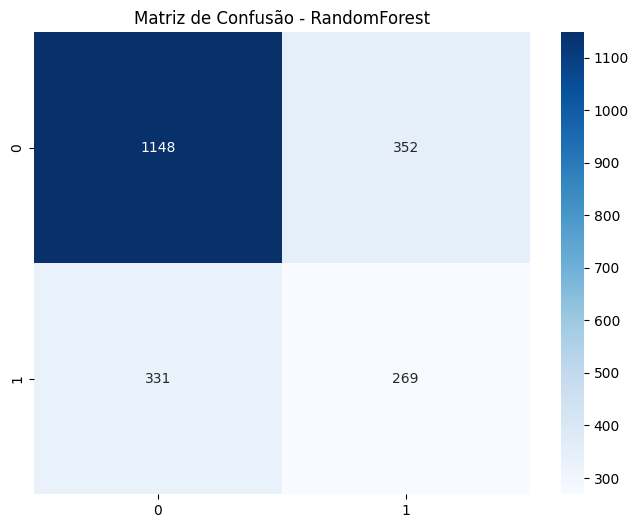


Relatório de Classificação - XGBoost:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1500
           1       0.49      0.29      0.37       600

    accuracy                           0.71      2100
   macro avg       0.62      0.59      0.59      2100
weighted avg       0.68      0.71      0.68      2100



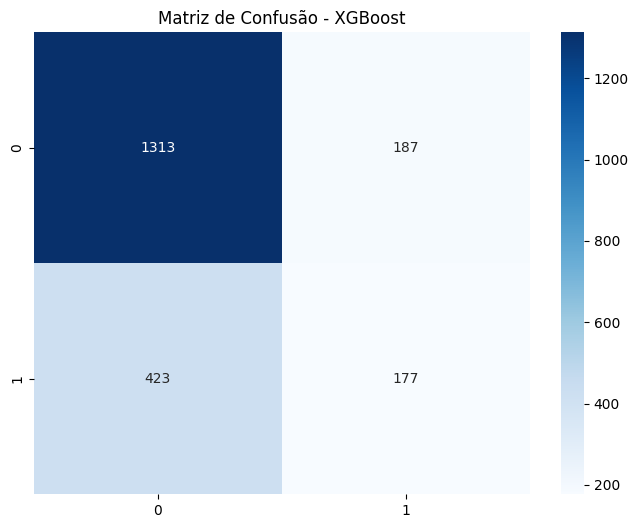

In [ ]:
# Divisão entre preditores (X) e alvo (y)
X = df.drop(['TARGET_M3OVER30', 'DATA_FINANCIAMENTO'], axis=1)
y = df['TARGET_M3OVER30']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Hiperparâmetros para RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [400, 500, 600],
    'max_depth': [6, 8, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

param_dist_xgb = {
    'n_estimators': [400, 500],
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'reg_alpha': [0.01, 0.1],
    'reg_lambda': [0.01, 0.1]
}

# RandomizedSearchCV para RandomForest
print("Ajustando RandomForest...")
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=3, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_
print("Melhores parâmetros para RandomForest:", best_rf_params)

# RandomizedSearchCV para XGBoost
print("Ajustando XGBoost...")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_search = RandomizedSearchCV(xgb, param_dist_xgb, n_iter=10, cv=3, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb_params = xgb_search.best_params_
print("Melhores parâmetros para XGBoost:", best_xgb_params)

# Treinando os modelos com os melhores parâmetros
rf_best = RandomForestClassifier(**best_rf_params, random_state=42)
xgb_best = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

rf_best.fit(X_train, y_train)
xgb_best.fit(X_train, y_train)

# Previsões e avaliação dos modelos
y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

# Avaliação - RandomForest
print("\nRelatório de Classificação - RandomForest:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "RandomForest")

# Avaliação - XGBoost
print("\nRelatório de Classificação - XGBoost:")
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

## Stacking Ensemble, BalancedBaggingClassifier & EasyEnsembleClassifier

### **Stacking Ensemble com Peso Maior no XGBoost**

1. O *Stacking Ensemble* é uma técnica de aprendizado de máquina que combina previsões de vários modelos (base learners) para gerar uma previsão final usando um meta-modelo (geralmente uma regressão logística). Cada modelo base faz previsões que são usadas como entradas para o meta-modelo.

  A ideia é combinar diferentes algoritmos para melhorar a generalização e obter melhor desempenho do que qualquer modelo individualmente.

2. Por que o peso maior para XGBoost?
  
  Ao construir o ensemble, o XGBoost terá maior influência nas previsões finais, porque é capaz de capturar padrões complexos e possui uma alta capacidade de modelagem. E como há um padrão complexo nos nossos dados, e você quer que um modelo (neste caso, o XGBoost) tenha maior influência nas decisões.

3. Quais vantagens?

 * Melhora a generalização combinando diferentes algoritmos;
 * Permite ajustar pesos entre diferentes modelos para focar mais em previsões desejadas (como o desempenho na classe 1).

### **BalancedBaggingClassifier**

1. O *BalancedBaggingClassifier* é uma variante do Bagging Ensemble (Bootstrap Aggregating), especificamente projetada para problemas com classes desbalanceadas. Ele gera várias amostras aleatórias (subconjuntos) do conjunto de treino, onde cada amostra é balanceada por undersampling, e depois treina um modelo para cada subconjunto.

Usamos neste caso porque nosso objetivo é reduzir o impacto de classes desbalanceadas, garantindo que cada modelo treinado receba subconjuntos balanceados e, assim, melhore o desempenho na previsão da classe minoritária.

2. Um ponto positivo para uso deste modelo é, quando as classes estão desbalanceadas e a classe minoritária é importante. E quando você quer reduzir o risco de overfitting aplicando bagging em várias amostras balanceadas.
Vantagem:

3. Vantagens

 * Ajuda a lidar com desequilíbrios nas classes;
 * Reduz o risco de overfitting, pois cada modelo é treinado em diferentes subconjuntos dos dados.

### **EasyEnsembleClassifier**

1. O EasyEnsembleClassifier é uma técnica de ensemble mais avançada, também voltada para problemas de classes desbalanceadas. Ele aplica bagging em múltiplos subconjuntos balanceados por undersampling e, em seguida, treina um modelo (como AdaBoost) para cada subconjunto. As previsões finais são feitas agregando as previsões de todos os modelos.

É usado para melhorar a previsão da classe minoritária aplicando boosting em múltiplos subconjuntos balanceados. O foco é maximizar o desempenho global e especialmente na classe minoritária, enquanto ainda mantém a capacidade de generalização.

Utilizado, também, para quando você precisa de um método poderoso para lidar com classes desbalanceadas. Quando a precisão na classe minoritária é crítica.

2. Vantagens

 * Combina bagging e boosting, proporcionando uma solução poderosa e eficiente para desequilíbrio de classes;
 * Geralmente obtém resultados melhores do que métodos simples de oversampling ou undersampling.

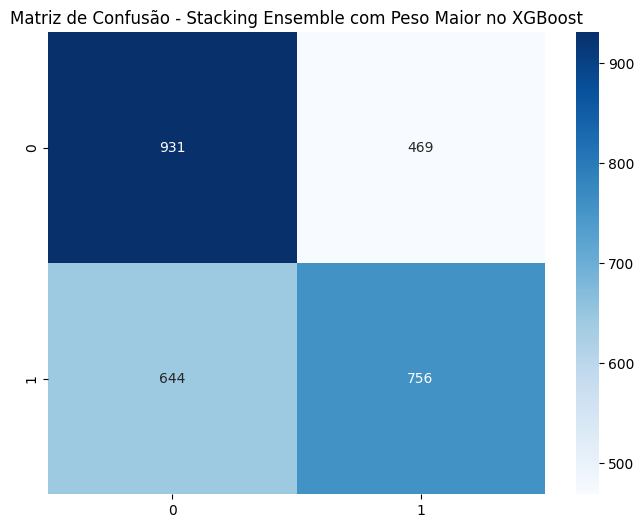


Relatório de Classificação - BalancedBaggingClassifier:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1400
           1       0.61      0.57      0.59      1400

    accuracy                           0.61      2800
   macro avg       0.61      0.61      0.60      2800
weighted avg       0.61      0.61      0.60      2800



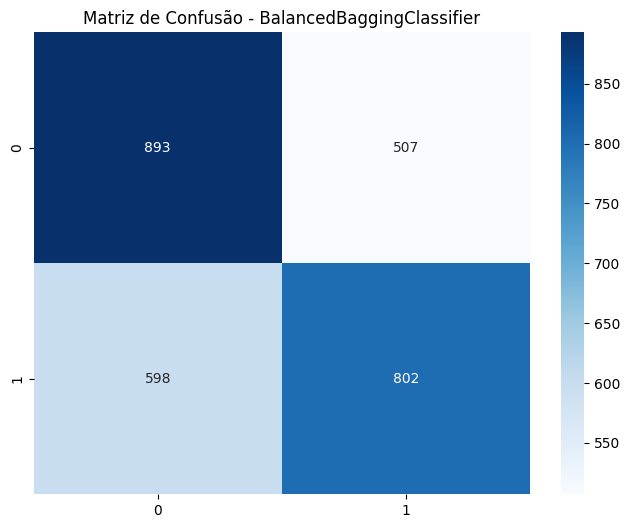


Relatório de Classificação - EasyEnsembleClassifier:
              precision    recall  f1-score   support

           0       0.58      0.69      0.63      1400
           1       0.62      0.50      0.55      1400

    accuracy                           0.60      2800
   macro avg       0.60      0.60      0.59      2800
weighted avg       0.60      0.60      0.59      2800



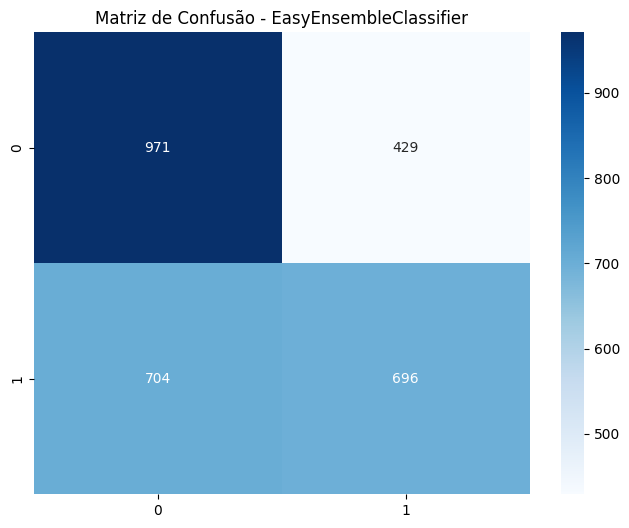

In [ ]:
# 1. Reajuste de Hiperparâmetros para XGBoost e RandomForest
rf_model = RandomForestClassifier(
    n_estimators=800, max_depth=12, min_samples_split=8, min_samples_leaf=2,
    class_weight='balanced', random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=800, max_depth=12, learning_rate=0.03, subsample=0.9,
    reg_alpha=1.5, reg_lambda=1.5, use_label_encoder=False, eval_metric='logloss',
    random_state=42
)

# 2. Configurando o Meta-Modelo e o Stacking Ensemble com Peso Maior para XGBoost
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=meta_model, n_jobs=-1, cv=StratifiedKFold(n_splits=5),
    stack_method='predict_proba'
)

# 3. Avaliação com Cross-Validation
y_pred_stack_cv = cross_val_predict(stacking_model, X_train_bal, y_train_bal, cv=5, method='predict')

# Função para Avaliar Modelos e Visualizar Matriz de Confusão
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nRelatório de Classificação - {model_name}:")
    print(classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

# Avaliação do Stacking Ensemble
evaluate_model(y_train_bal, y_pred_stack_cv, "Stacking Ensemble com Peso Maior no XGBoost")

# 4. Testando BalancedBaggingClassifier e EasyEnsembleClassifier para Comparação
bb_classifier = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(), n_estimators=10, random_state=42
)

ee_classifier = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# Cross-validation com BalancedBaggingClassifier
y_pred_bb_cv = cross_val_predict(bb_classifier, X_train_bal, y_train_bal, cv=5, method='predict')
evaluate_model(y_train_bal, y_pred_bb_cv, "BalancedBaggingClassifier")

# Cross-validation com EasyEnsembleClassifier
y_pred_ee_cv = cross_val_predict(ee_classifier, X_train_bal, y_train_bal, cv=5, method='predict')
evaluate_model(y_train_bal, y_pred_ee_cv, "EasyEnsembleClassifier")

### Análise dos Resultados


Stacking Ensemble com Peso Maior no XGBoost:

 * Acurácia: 0.60
 * Classe 1 - Recall: 0.54
 * F1-Score Classe 1: 0.58

O ensemble conseguiu um desempenho equilibrado entre precisão e recall, embora ainda tenha um espaço para melhorar o recall da classe 1.

**BalancedBaggingClassifier**:

 * Acurácia: 0.61
 * Classe 1 - Recall: 0.57
 * F1-Score Classe 1: 0.59

Este classificador trouxe um leve ganho de recall, mas introduziu mais falsos positivos, reduzindo a precisão.

**EasyEnsembleClassifier**:

 * Acurácia: 0.60
 * Classe 1 - Recall: 0.50
 * F1-Score Classe 1: 0.59

O EasyEnsemble manteve um bom desempenho geral, mas com uma leve redução no recall da classe 1 em comparação com o BalancedBaggingClassifier.